<a href="https://colab.research.google.com/github/saraswatiyangandul20/BikeSharingDemandPrediction/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    BikeSharingDemandPrediction



# **Project Summary -**

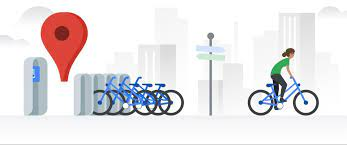
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

First we import the necessary libraries and look at our data and its characteristics. We have a dataset of 8760 rows and 14 columns with no duplicate/missing data. Next we study the features thoroughly and the data it represents.

We first see that the column 'Date' is in 'object' datatype, and we convert it to datetime datatype. Later from the date column, we extract, 'Date', 'month', 'year' and number of week, We drop the date column and we rename columns for convinence.

We ploted various charts and explored usefull insites.

Based on our visualizations, we formulate 3 hypothetical statements and perform hypothesis tests. The statements are:

>1. The average bike count in Seoul city at any point of time is greater than 100.
>2. The average temperature in Seoul city at any point is grater than 10 degree Celsius.
>3. The Standard deviation of humdidity in Seoul city is 20.

Furthur, we performed one hot encoding on our categorical features with dropping the first column being true. We found out during visualization that our dependant variable, 'Rented_bike_count' was right skewed, hence to overcome this we applied a squareroot transformation to get a normal distribution. Next we scaled our data using MinMax scaler. Finally we split our data into train and test in 80-20 ratio.

The data was ready to fit into a machine learning model, we implemented the various models and calculated the various stastical parameters for the performance

Finally, we see that the bike rental company can deploy a machine learning model that uses Random Forest Regressor to predict the demand for city bikes for a particular hour, which can help the company meet the demand accurately.

# **Problem Statement**


**The problem statement for this project is to develop a machine learning model that can accurately predict the number of rental bikes required at each hour in urban cities. This is crucial for ensuring a stable supply of rental bikes and minimizing waiting times for users. The project aims to address the challenge of making rental bikes available and accessible to the public at the right time by predicting the demand for rental bikes at different times of the day. The ultimate goal is to help cities optimize their bike-sharing systems by predicting demand and allocating resources accordingly**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from pandas.core.groupby import groupby
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

# reading data file
dir_path = '/content/drive/MyDrive/Capstone 2:Bike Sharing/'
file_name = 'SeoulBikeData.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path, encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Dataset First Look
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
x = df.shape
print(f'Dataset has {x[0]} rows and {x[1]} columns')

Dataset has 8760 rows and 14 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

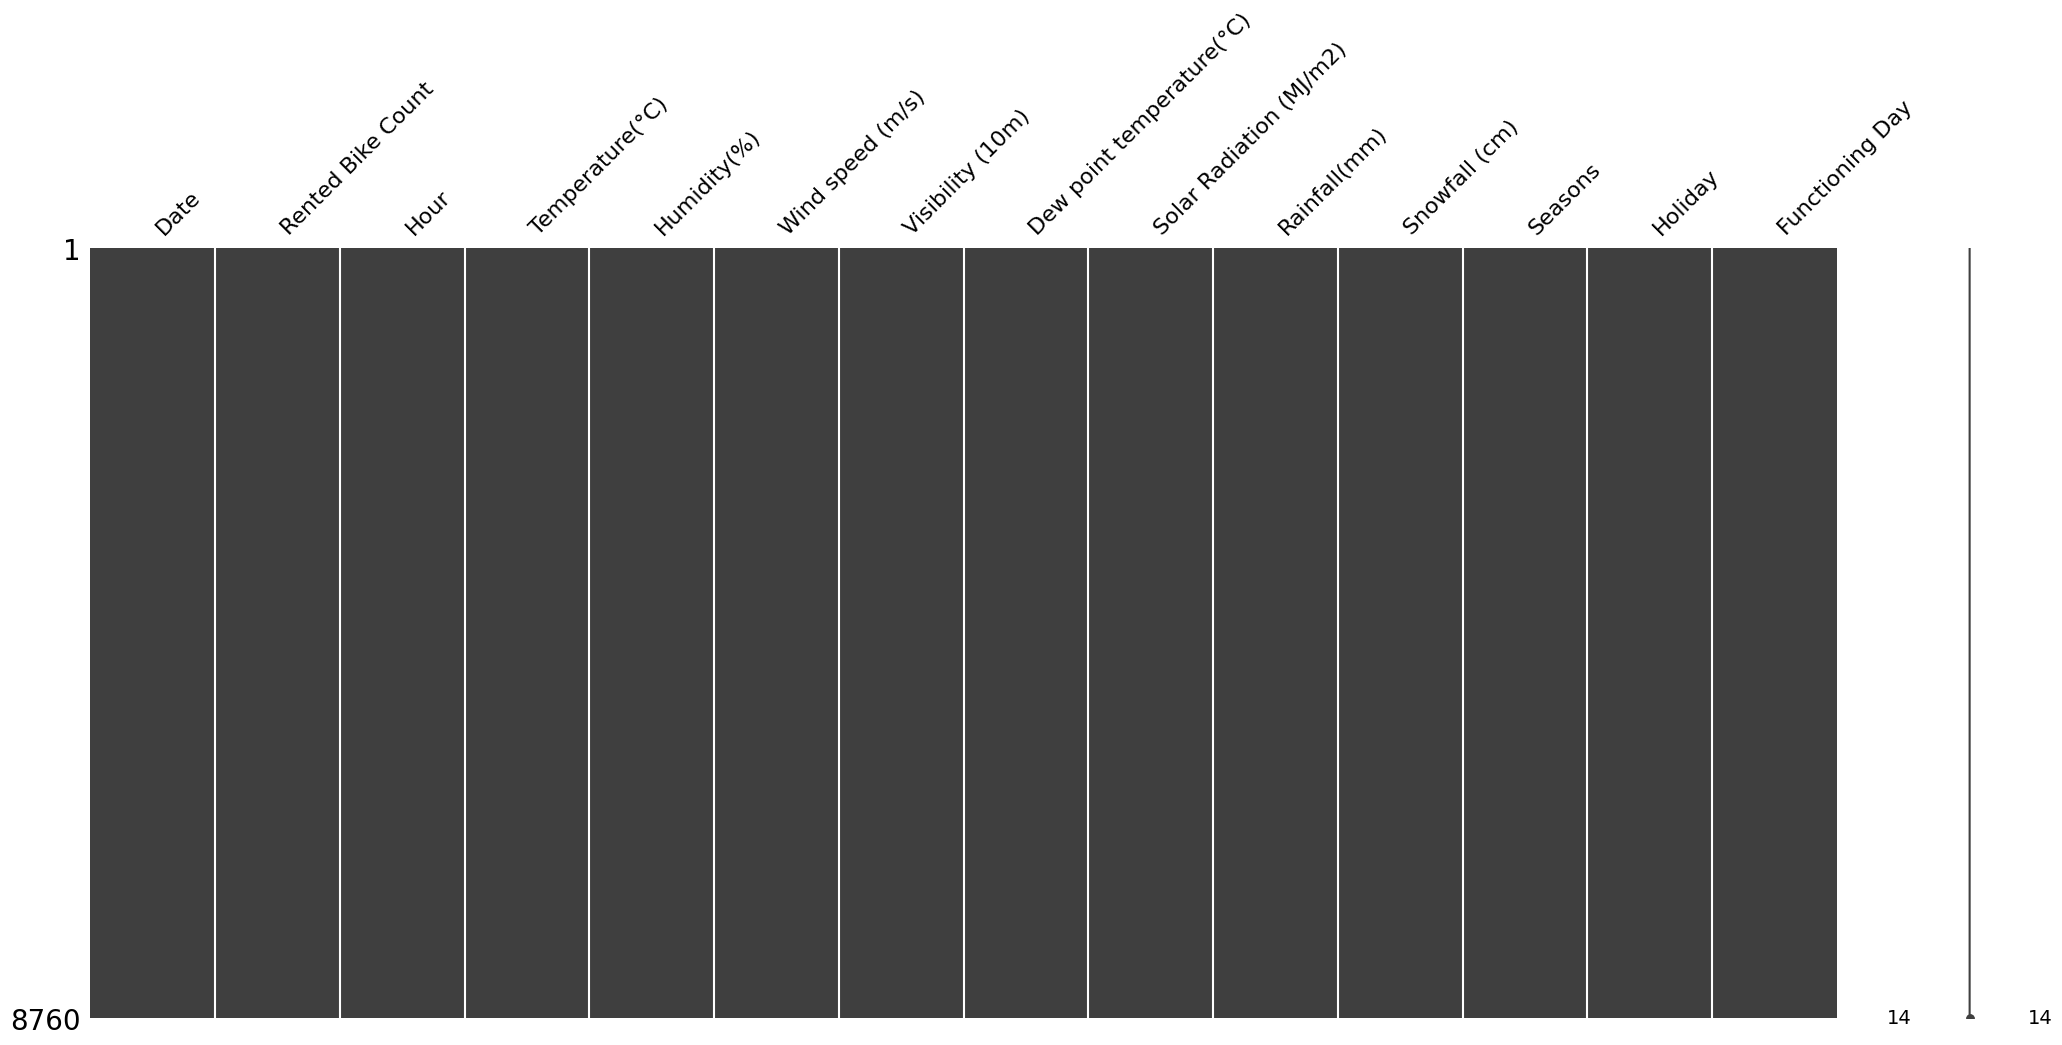

In [ ]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Listingand  values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
  if res<25:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )

The number of unique variables in Date column are: 365
The number of unique variables in Rented Bike Count column are: 2166
The number of unique variables in Hour column are: 24
printing unique values of Hour
the values are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of unique variables in Temperature(°C) column are: 546
The number of unique variables in Humidity(%) column are: 90
The number of unique variables in Wind speed (m/s) column are: 65
The number of unique variables in Visibility (10m) column are: 1789
The number of unique variables in Dew point temperature(°C) column are: 556
The number of unique variables in Solar Radiation (MJ/m2) column are: 345
The number of unique variables in Rainfall(mm) column are: 61
The number of unique variables in Snowfall (cm) column are: 51
The number of unique variables in Seasons column are: 4
printing unique values of Seasons
the values are:  ['Winter' 'Spring' 'Summer' 'Autumn']
The number of uniqu

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['Date']=pd.to_datetime(df['Date']) #converting the Date column to date time format

# creating new colums with respect to their features for future use
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# using the date column we can get the week number, this can help us understand the weekly growth
df['Week Number'] = df['Date'].dt.week

# since all the required column information is in place, dropping the date column
df.drop(columns=['Date'],axis='columns',inplace=True)

In [ ]:
# we found most of the columns are attached with their units, omitting them and setting data colums as per our understanding and human understandable and fesible in coding
df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'Wind Speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew Point Temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'
                       }, inplace = True)

### What all manipulations have you done and insights you found?

We found there were no missing values

we have extracted Day, Month, year and week number from date colum and dropped date column

We have renamed the columns and removed the units, It'll help us to code easy

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

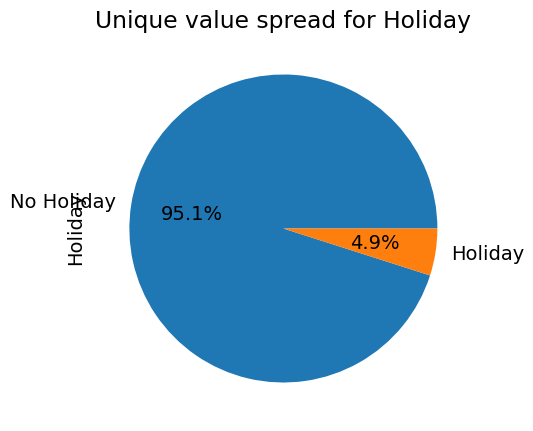

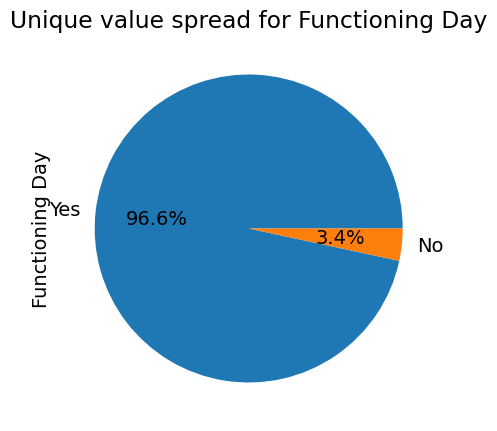

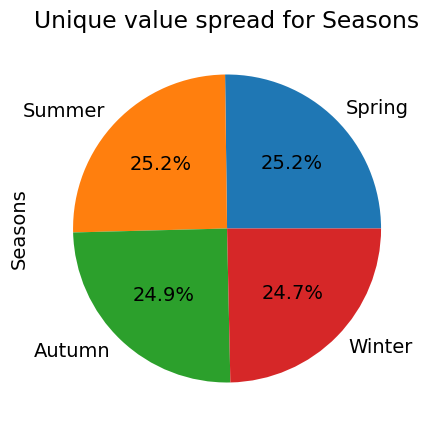

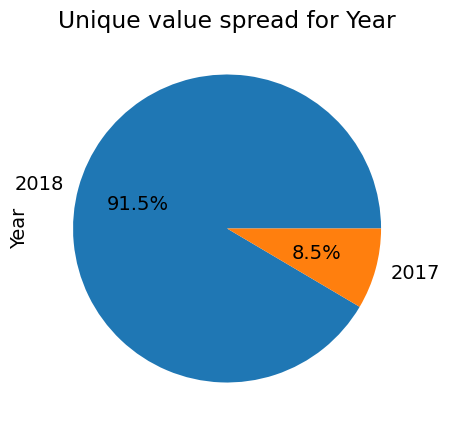

In [ ]:
# Chart - 1 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), year(2) and Seasons(4),
# we are plotting pie plot to understand their share in the dataframe

# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]

# looping for every element in the list
for elements in x:
  spread = df[elements].value_counts()
  plt.rcParams['figure.figsize'] = (5,5)

  # pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
  spread.plot(kind = 'pie', autopct='%1.1f%%', pctdistance=0.6)

  #setting colum chart title
  plt.title(f'Unique value spread for {elements}')
  plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

1. Its is observed that 95% of days are working(not holiday) and 4.9% of days are holidays in the data given.
2. 96.6 % of values are recorded as functioning day where are the remaining are non functioning day
3. the data recorded in various season are almost equal (near to 25%)
4. the data has records of year 2017 and 2018 where most of the data belongs to 2018(91.5%) where as for 2017 its 8.5%.
5. the start date is 2017-01-12 and last date is 2018-12-11
the following code was used to extract information on point 5 before droping the date column
>```
min_date= df['Date'].min()
max_date = df['Date'].max()
print(f'the start date is {min_date} and last date is {max_date}')
>```



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is understood that mostly the days are functional or not holiday.

the data is captured for all the season, analysis can be more strong as data for all seasons is captured including functioning day and holidays.

the captured data falls under the range start date = 2017-01-12 and last date = 2018-12-11

#### Chart - 2

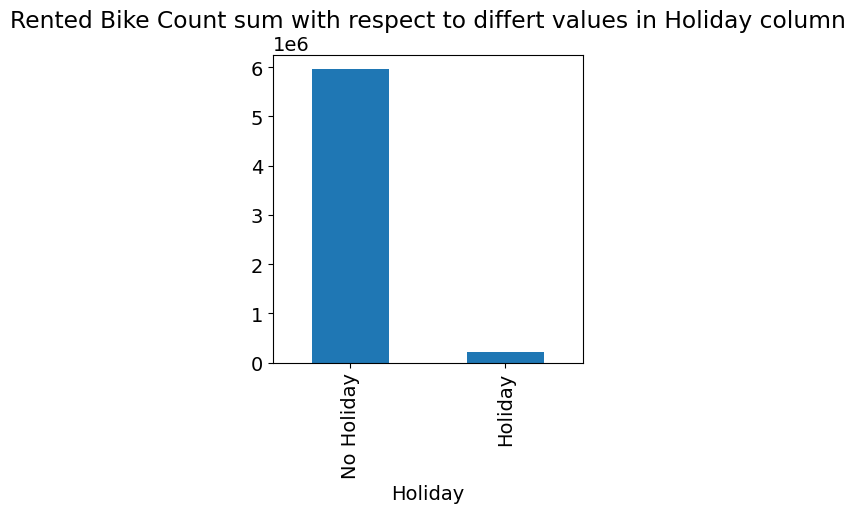

Holiday
No Holiday    5956419
Holiday        215895
Name: Rented Bike Count, dtype: int64


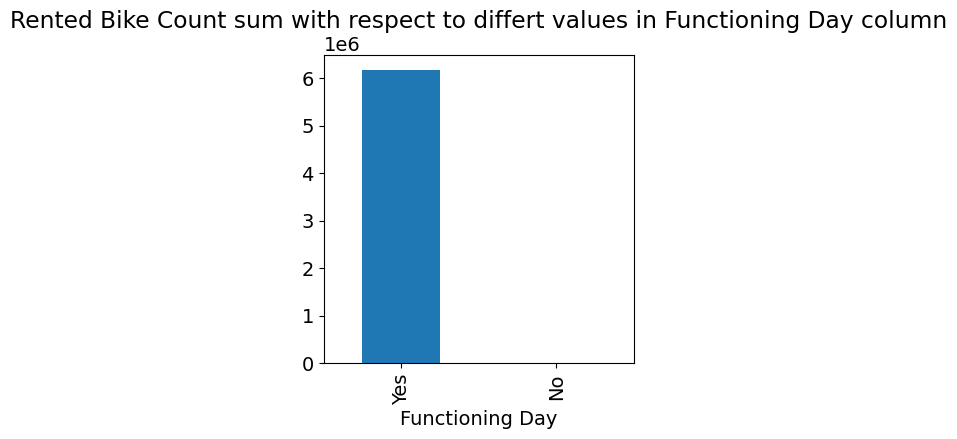

Functioning Day
Yes    6172314
No           0
Name: Rented Bike Count, dtype: int64


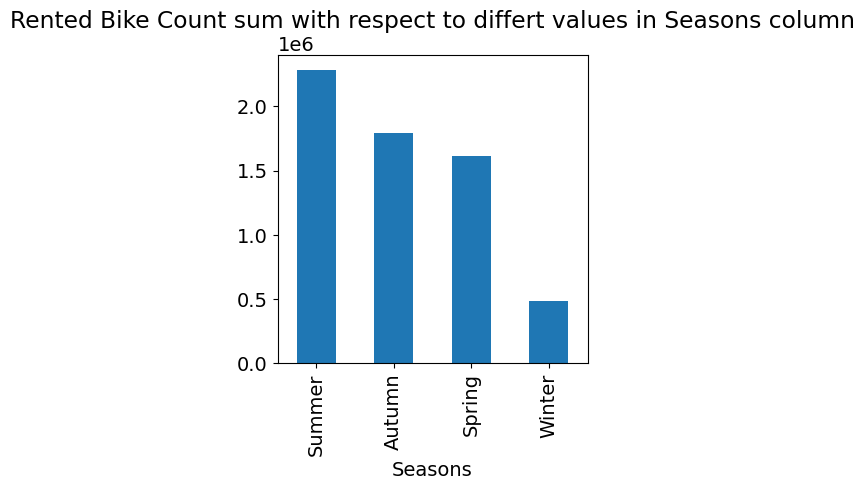

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64


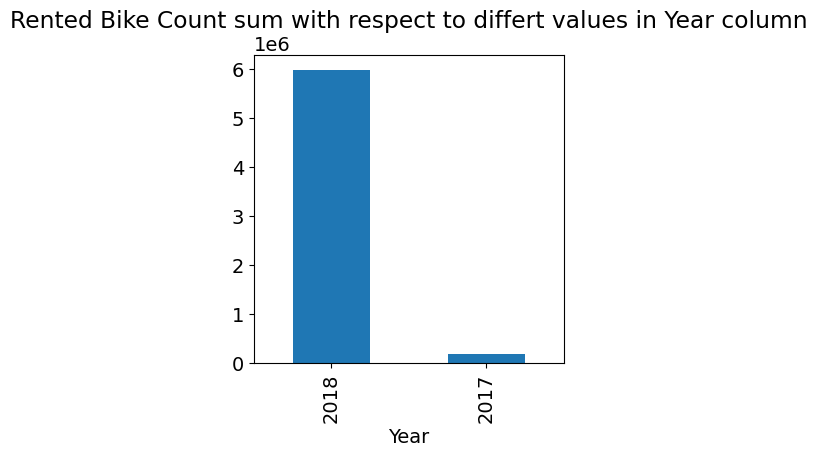

Year
2018    5986984
2017     185330
Name: Rented Bike Count, dtype: int64


In [ ]:
# Chart - 2 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), Seasons(4), and Year(2)
# we are plotting bar plot to understand total rented bikes sum with respect to each category

# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]

# looping for every element in the list
for elements in x:
  rented_bike_sum = df.groupby(elements)['Rented Bike Count'].sum().sort_values(ascending = False)
  plt.rcParams['figure.figsize'] = (4,4)
  # plotting bar plot
  rented_bike_sum.plot.bar()

  #setting colum chart title to infer about the chart
  plt.title(f'Rented Bike Count sum with respect to differt values in {elements} column')
  plt.show()
  # printing values obtained for reference
  print(rented_bike_sum)

##### 1. Why did you pick the specific chart?

Bar charts show the sum beautifully and helps us interpret in a better way.



##### 2. What is/are the insight(s) found from the chart?

1. the sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895
2. The sume of bikes rented on Functioning Day is 6172314 and on a non functioning day is 0
3. the following are the sum of bike rented with respect to various seasons
>```
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
>```
>it is found that in winter the bikes are rented less comparitivly and heighest in Summer
4. The total bikes rented in 2018 is 5986984 and in 2017 is 185330


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.
2. During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented.



#### Chart - 3

<Axes: xlabel='Year,Month'>

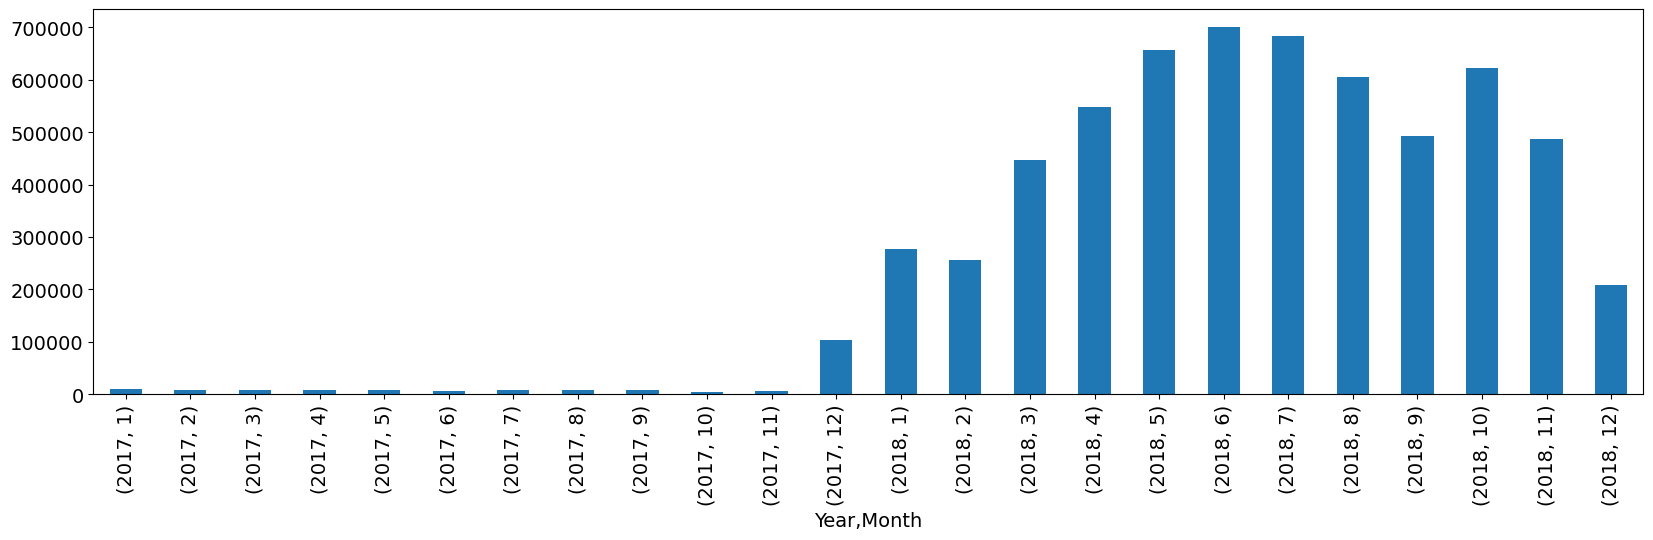

In [ ]:
# Chart - 3 visualization code
# as observed in chart 2 with various seasons the bike rented are varing extreemly, sol plotting with a bar chart to understand with respect to various months
# of the business year
group_by_year_month = df.groupby(['Year', 'Month'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
group_by_year_month.plot.bar()

##### 1. Why did you pick the specific chart?

A verticle bar represents the total in a better way




##### 2. What is/are the insight(s) found from the chart?

It is observed that the first 11 months the compay had less rented bikes while
the bike rentals started to spike from december 2017, though it was not that great however the growth seems to look significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After sustaining the market for 11 moths the company started to grow its sales.



#### Chart - 4

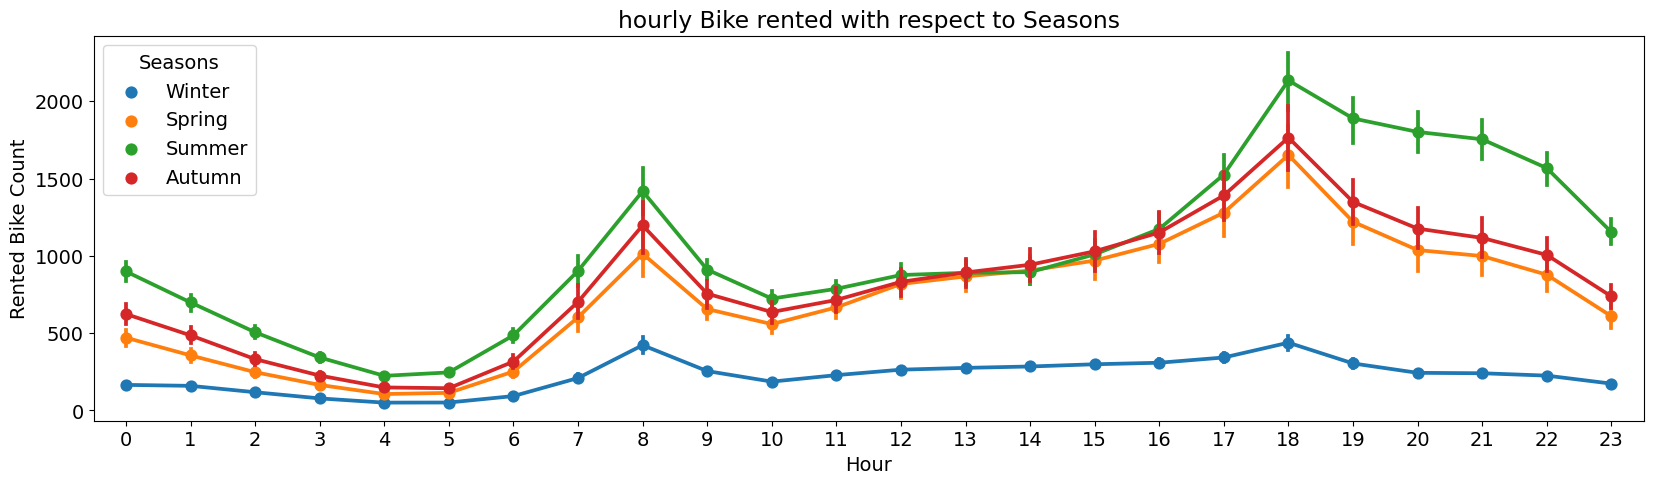

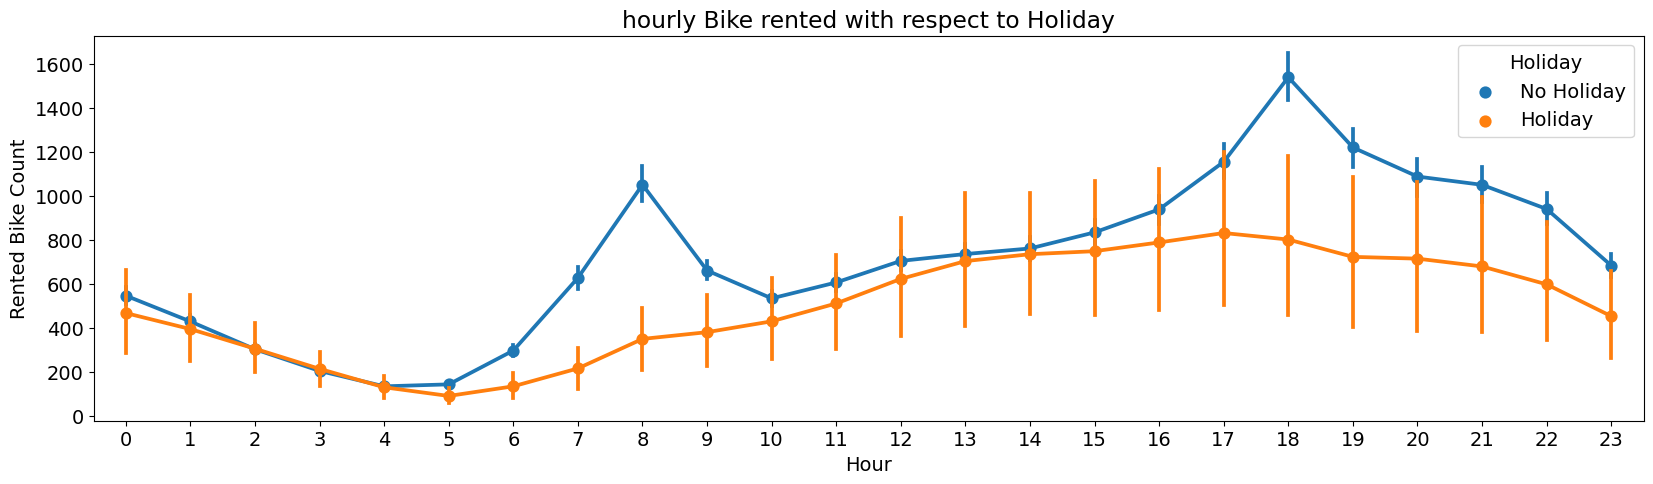

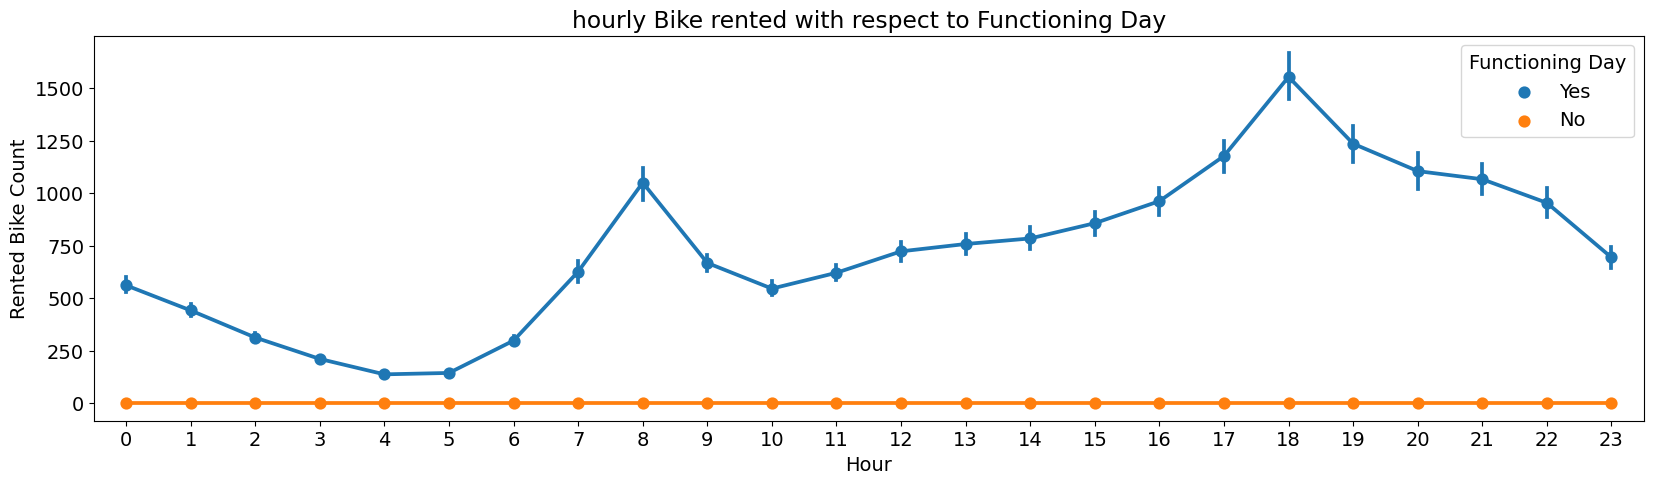

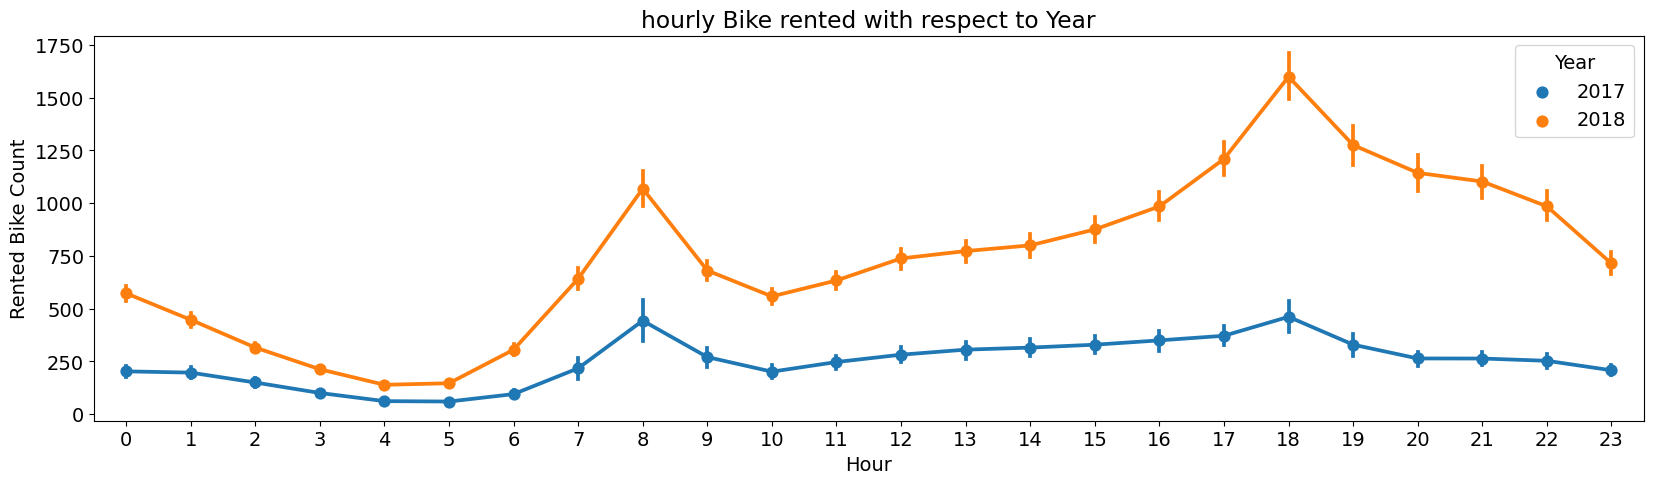

In [ ]:
# Chart - 4 visualization code
# Exploring the Bike rentals with respect to Seasons, Holiday, and year
Parameters = ['Seasons', 'Holiday', 'Functioning Day', 'Year']
#looping through all the parameters chosen
for ele in Parameters:
  plt.title(f'hourly Bike rented with respect to {ele}')
  sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=ele)
  plt.show()

##### 1. Why did you pick the specific chart?

Since the data ranges from 0 to 23 as number of hours, a line chart can represent the data very well.


##### 2. What is/are the insight(s) found from the chart?

1. It is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.
2. Bike rented during non functional day is Zero
3. Bikes demand is more during Summer and less during the winters



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.

#### Chart - 5

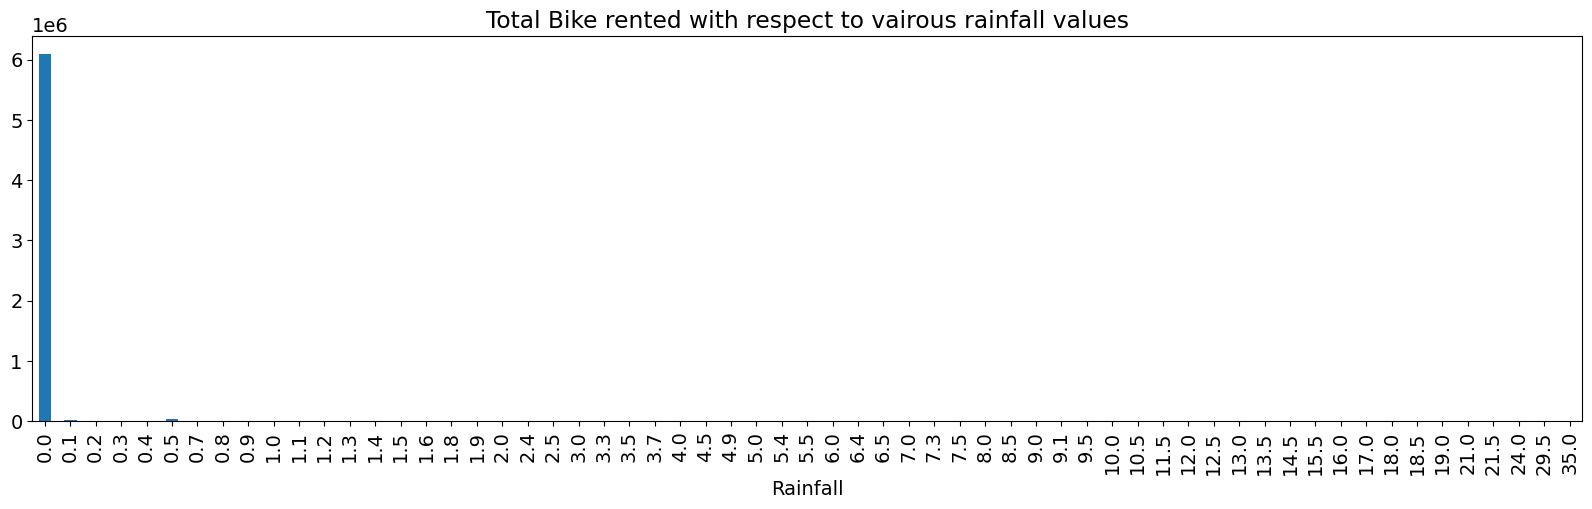

----------------------------------------------------------------------------------------------------
it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation
----------------------------------------------------------------------------------------------------


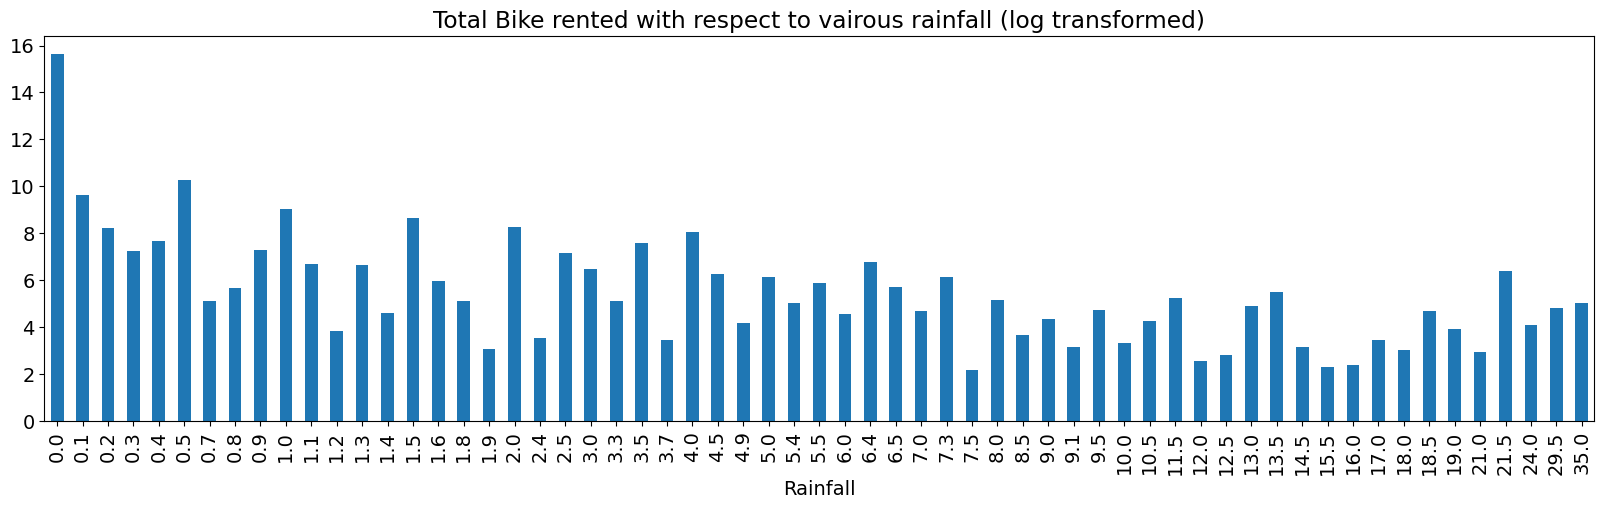

In [ ]:
# Chart - 5 visualization code
rainfall_rent = df.groupby(['Rainfall'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
rainfall_rent.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall values')
plt.show()
print('-'*100)
print('it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation')
print('-'*100)

rainfall_rent_log = np.log(rainfall_rent)
# rainfall_rent_filtered = rainfall_rent[~(rainfall_rent.index == 0.0)]

rainfall_rent_log.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall (log transformed)')
plt.show()
# print(rainfall_rent_filtered)

##### 1. Why did you pick the specific chart?

Bar charts give a better understanding for the understanding this situation.

##### 2. What is/are the insight(s) found from the chart?

It was observed that the bike rent was more when the rainfall was 0.0, however when we excluded rainfall values of 0.0, we observed that most of the bikes that were rented were during less values of rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer that most of the people rent bikes when there is less rainfall, and when the rainfall is more the sales dips with increase in rainfall values

#### Chart - 6

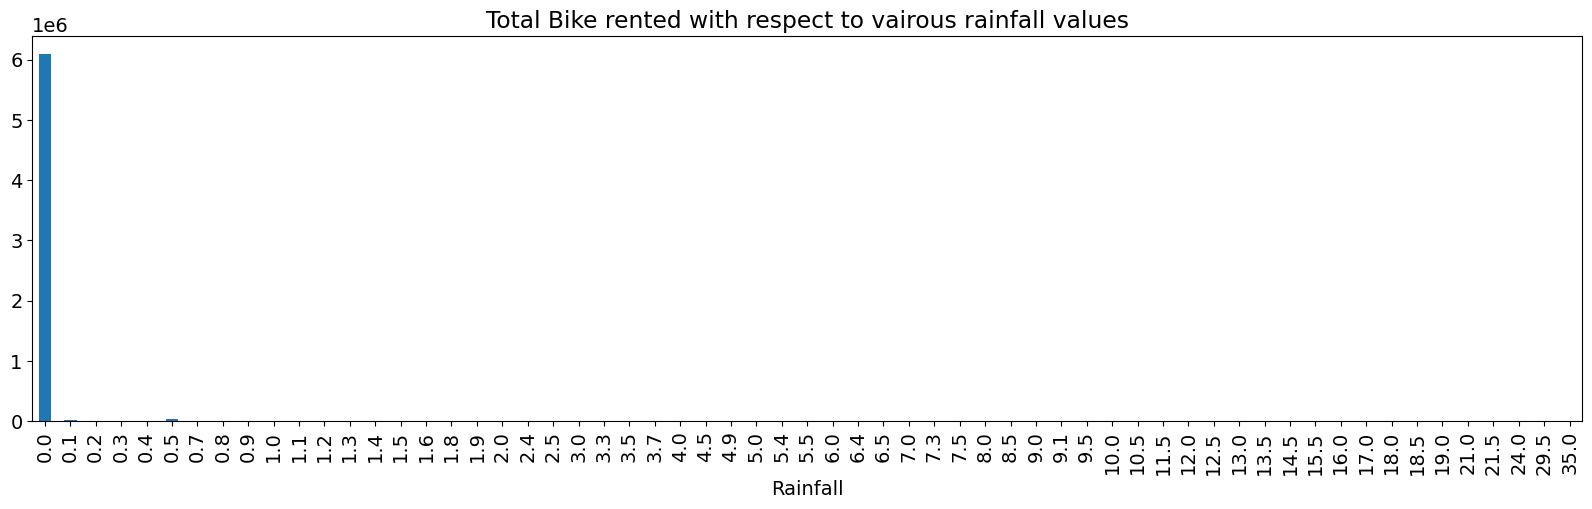

----------------------------------------------------------------------------------------------------
it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation
----------------------------------------------------------------------------------------------------


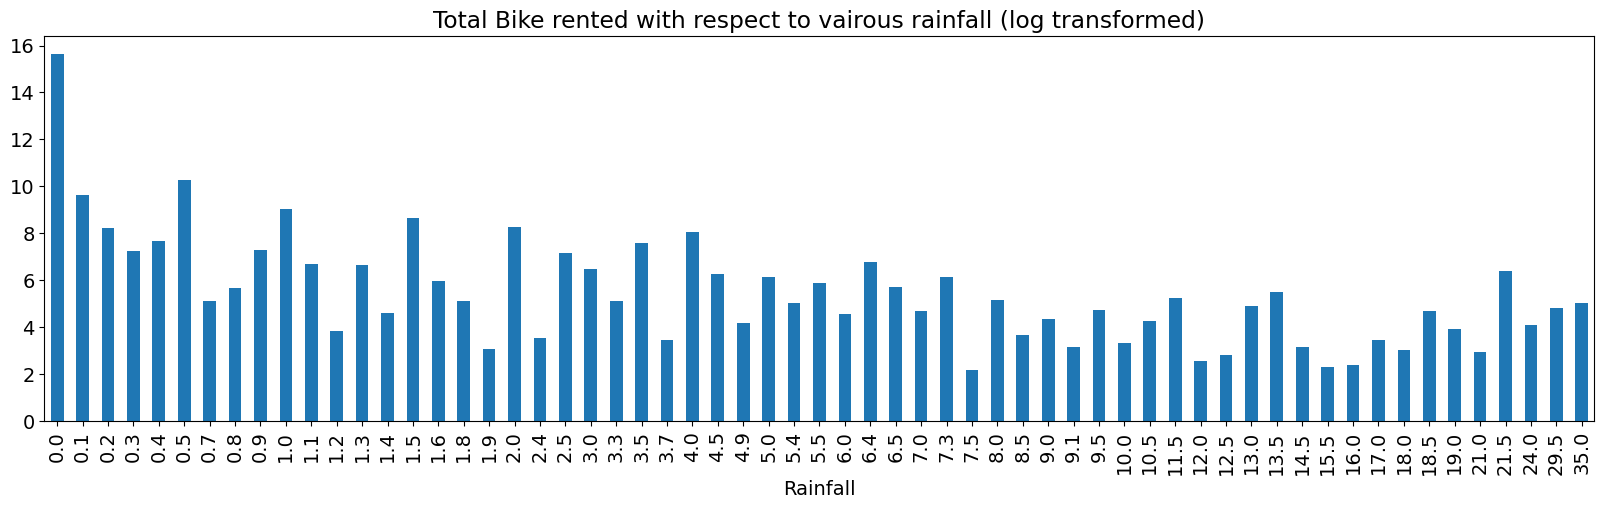

In [ ]:
# Chart - 5 visualization code
rainfall_rent = df.groupby(['Rainfall'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
rainfall_rent.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall values')
plt.show()
print('-'*100)
print('it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation')
print('-'*100)

rainfall_rent_log = np.log(rainfall_rent)
# rainfall_rent_filtered = rainfall_rent[~(rainfall_rent.index == 0.0)]

rainfall_rent_log.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall (log transformed)')
plt.show()
# print(rainfall_rent_filtered)

##### 1. Why did you pick the specific chart?

Bar charts give a better understanding for the understanding this situation.

##### 2. What is/are the insight(s) found from the chart?

data is uniformly distributed, we see that the wind speed doesnot affect the bike renting

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People prefer to drive bike when the wind speed is moderate between 0.3 to 3.4.
there is an impact of wind speed on the bike renting preference

#### Chart - 7

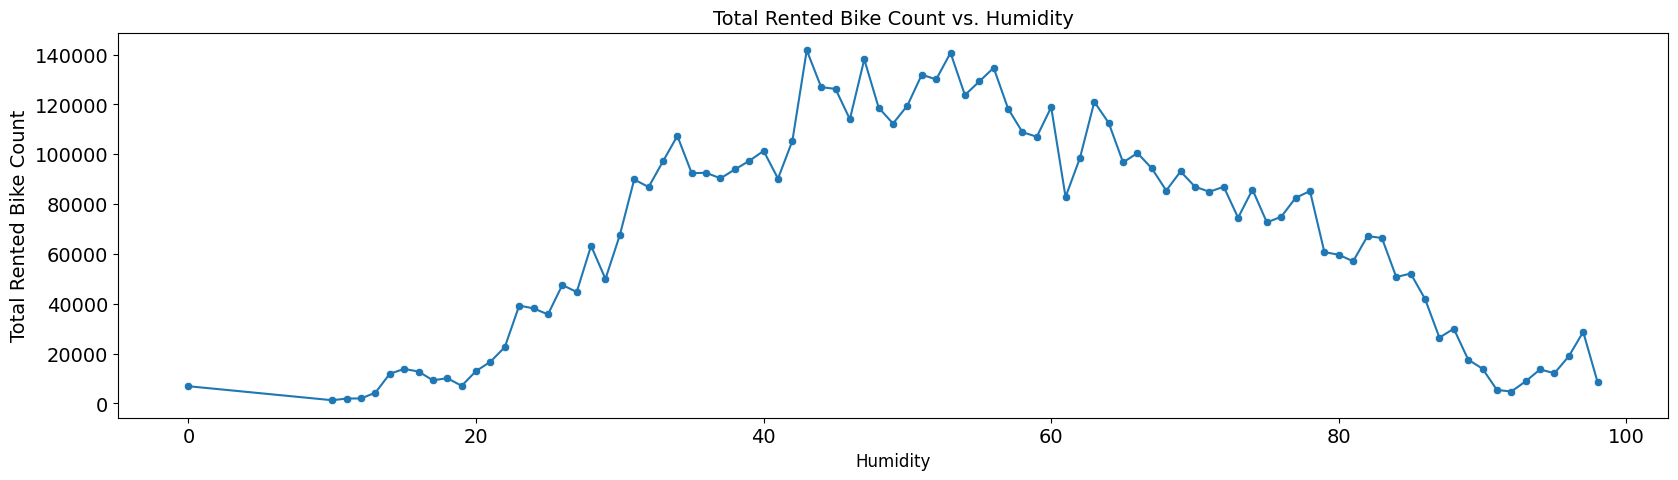

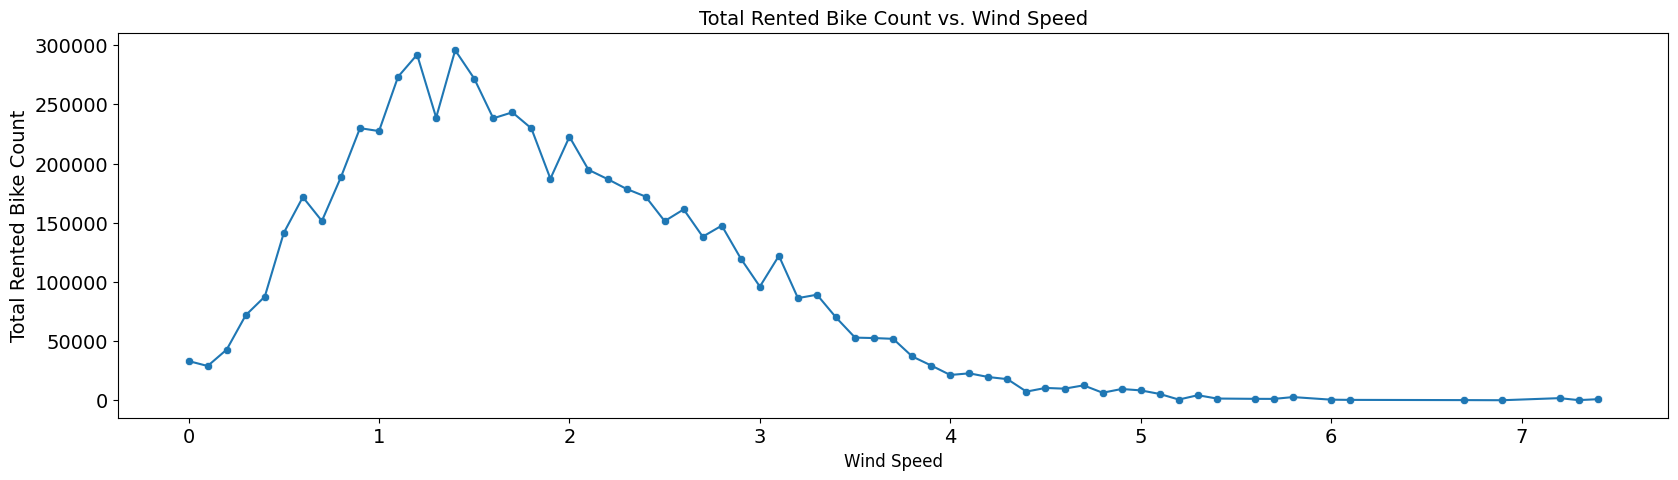

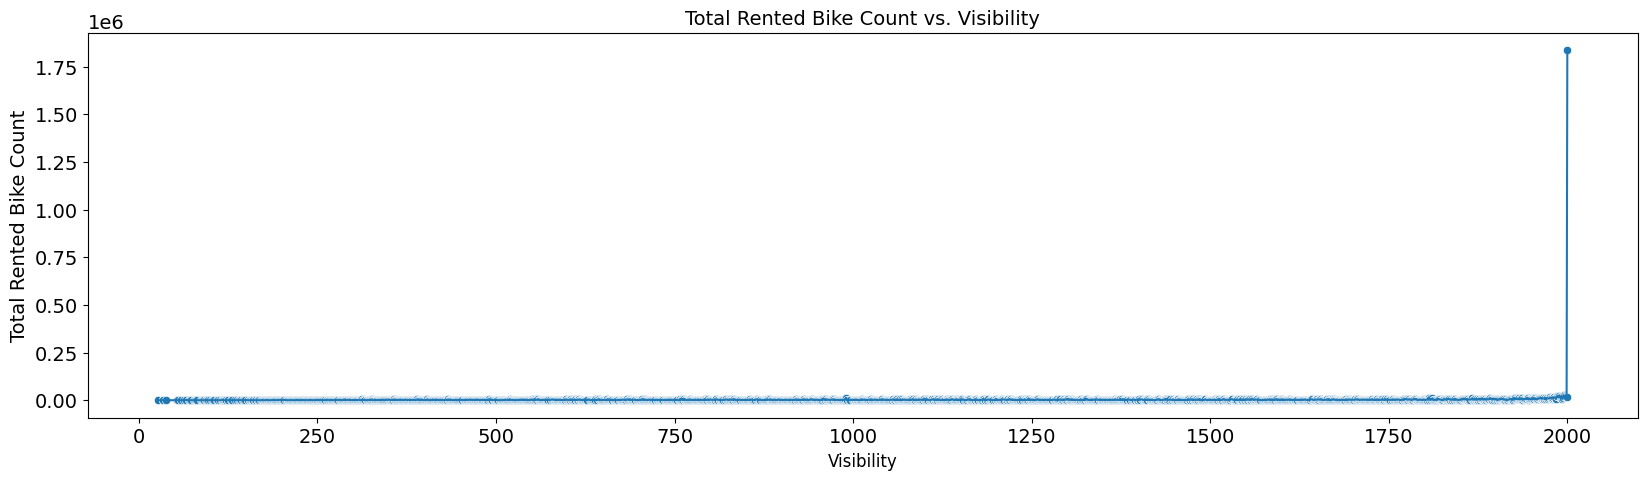

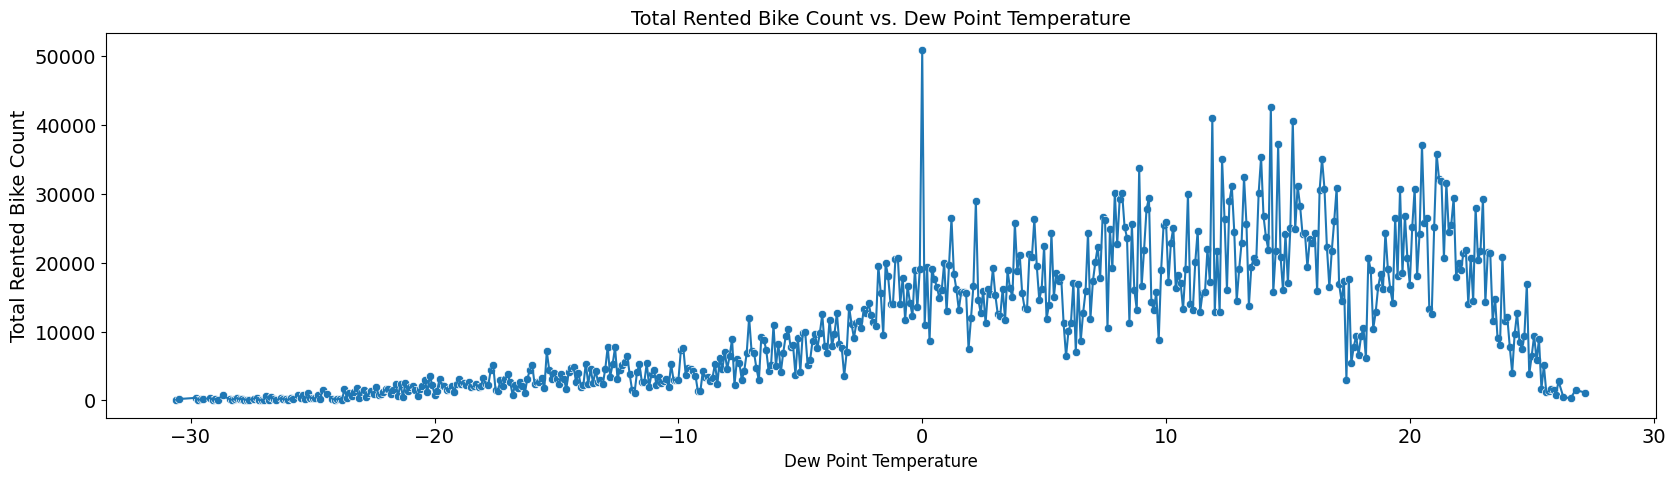

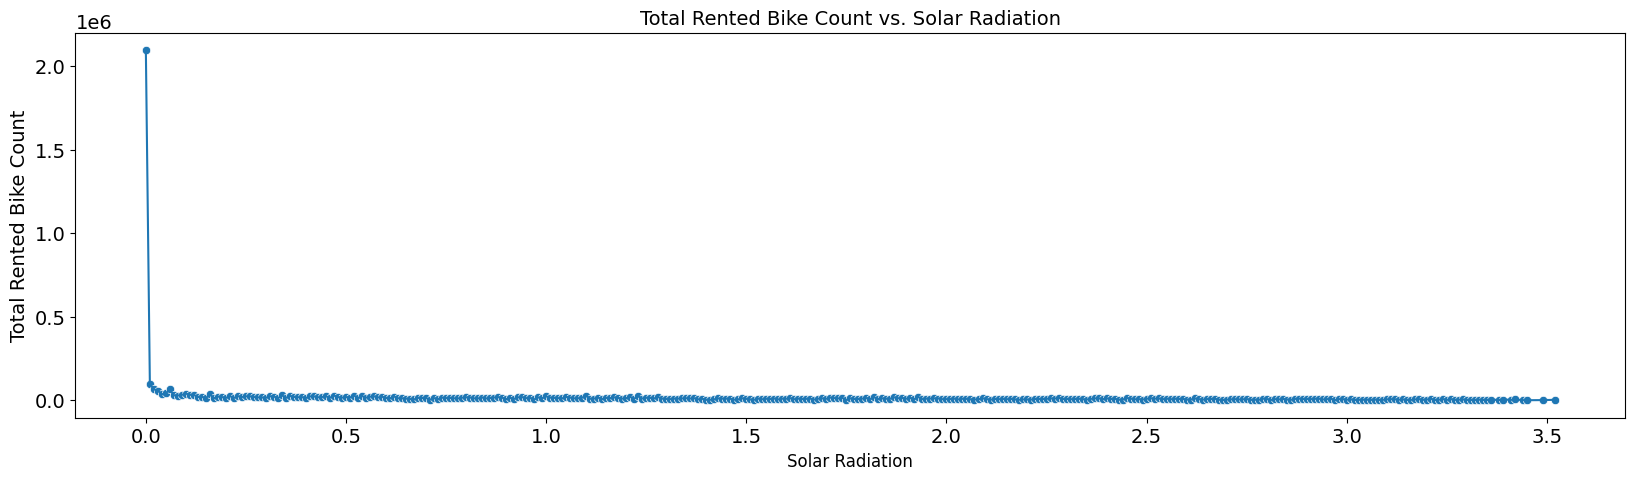

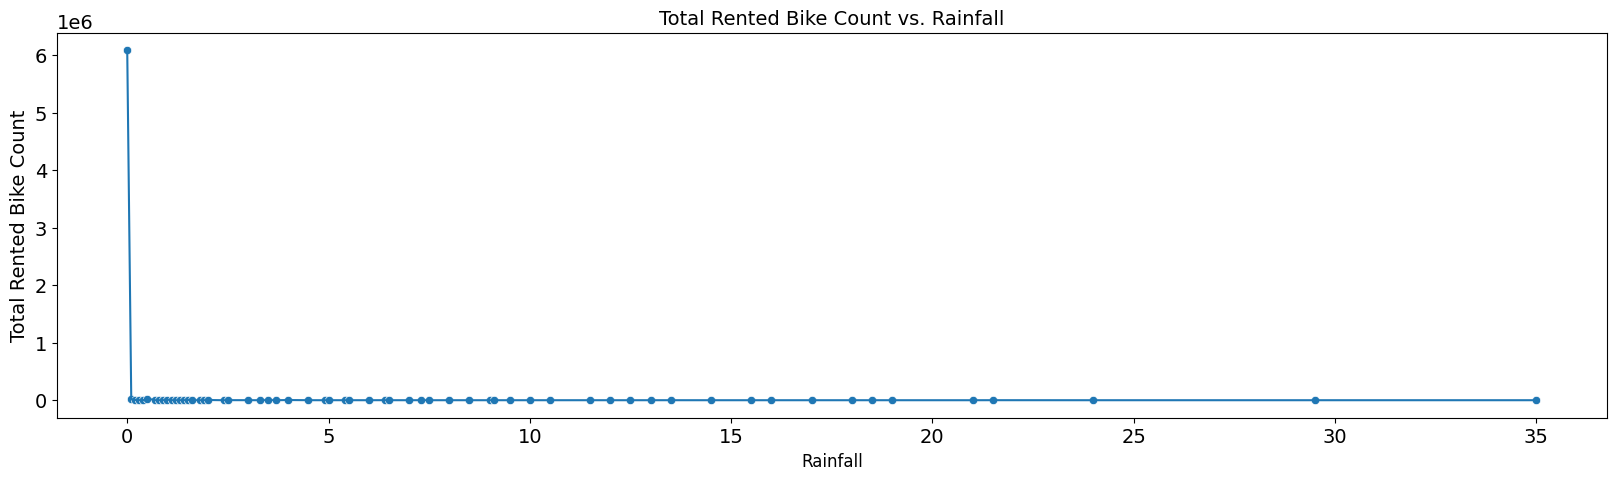

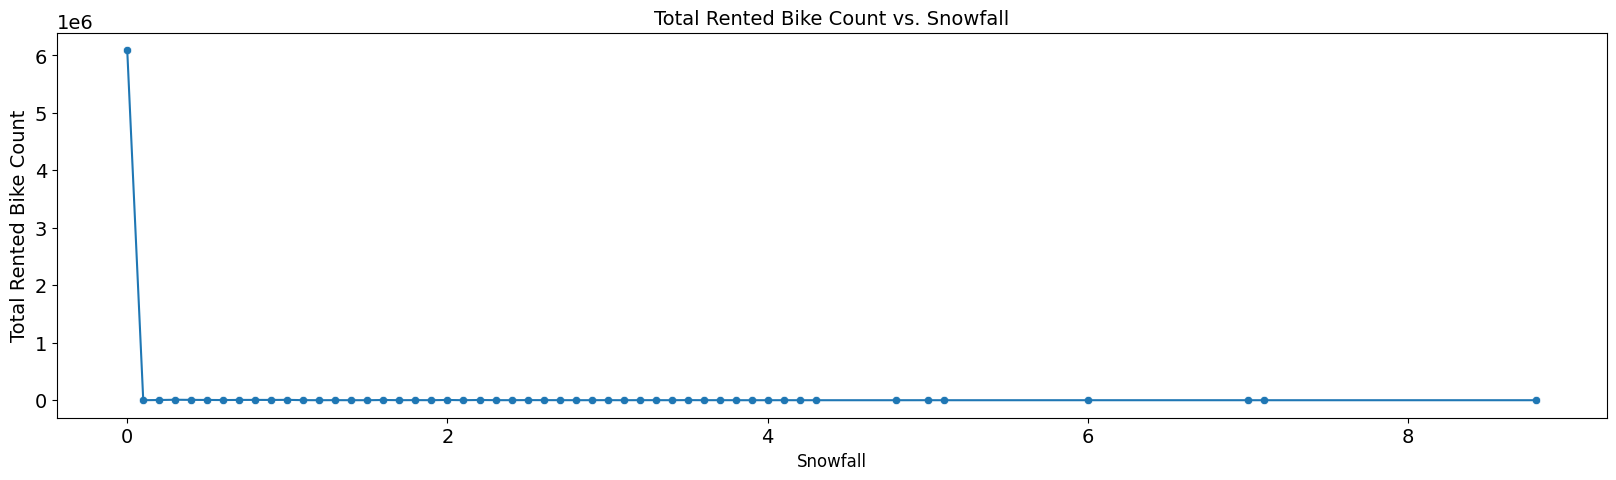

In [ ]:
# Chart - 7 visualization code

numrical_features = ['Humidity', 'Wind Speed',  'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']

for feature in numrical_features:
  temp_df = df.groupby([feature])['Rented Bike Count'].sum()
  temp_df = temp_df.reset_index()
  sns.scatterplot(data=temp_df, x=feature, y='Rented Bike Count')
  sns.lineplot(x=feature, y='Rented Bike Count', data=temp_df)
  plt.xlabel(feature,  fontsize=12)
  plt.ylabel('Total Rented Bike Count',  fontsize=14)
  plt.title(f'Total Rented Bike Count vs. {feature}',  fontsize=14)
  plt.show()

##### 1. Why did you pick the specific chart?

a line plot helps us understand the trends efficiently.

##### 2. What is/are the insight(s) found from the chart?

the following observations we found:
1. when the wind speed is 0.3 to 4 people prefer to rent bike.
2. when the visibility is high(2000) people tend to rent bike more
3. when dew point temperature is -0.25 to 25 people tend to rent bike more.
4. when the soloar radiation is less(0.0), people tend to rent bike.
5. when the Rainfall is less(0.2), people tend to rent bike
6. when the snowfall is less(0.1), people tend to rent bike

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is an impact of the weather conditions on the people renting bikes

#### Chart - 8

<Axes: xlabel='Year,Week Number'>

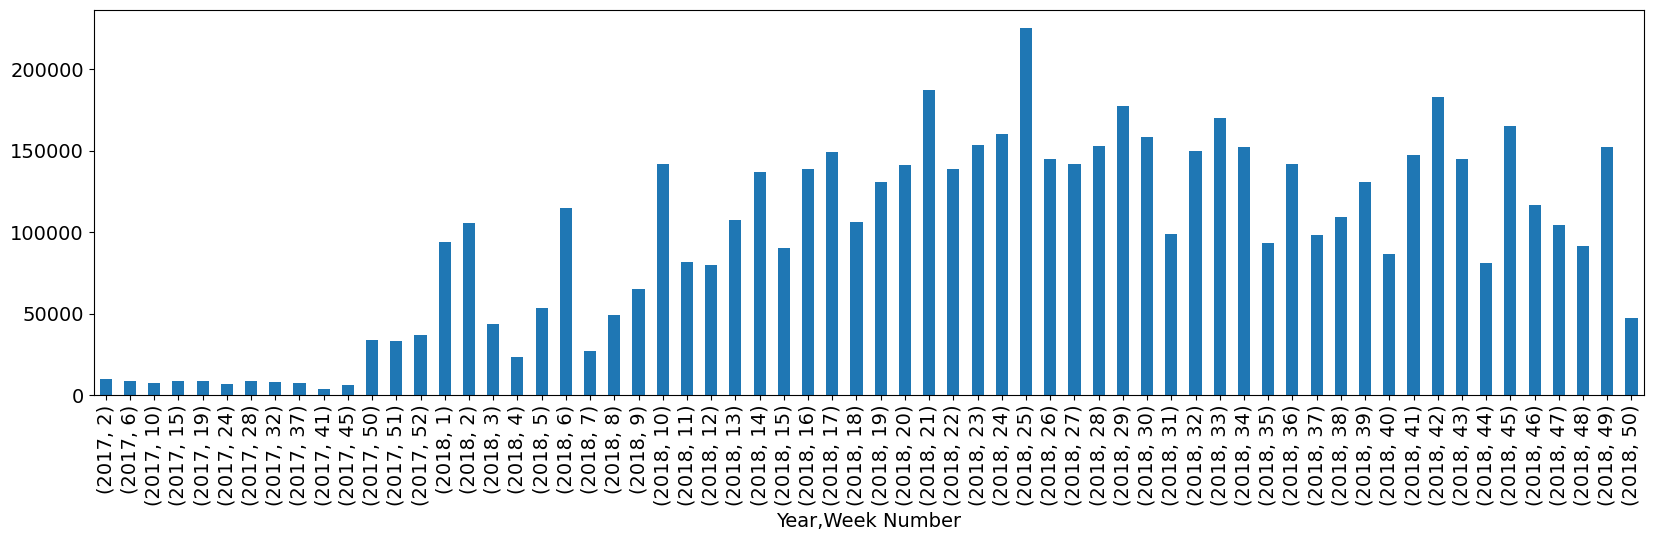

In [ ]:
# # Chart - 8 visualization code

# as observed in chart 2 with various seasons the bike rented are varing extreemly, so plotting with a bar chart to understand with respect to various weeks
# of the business year
Weekly_growth_in_rented_bike = df.groupby(['Year', 'Week Number'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
Weekly_growth_in_rented_bike.plot.bar()

##### 1. Why did you pick the specific chart?

A bar plot is well suited to explore this data

##### 2. What is/are the insight(s) found from the chart?

It is observed that initial weeks are slow in growth where as after 50th week the sales increased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is positive growth from second week and it is observed that on 25th week of the 2nd year saw max bikes rented

#### Chart - 9

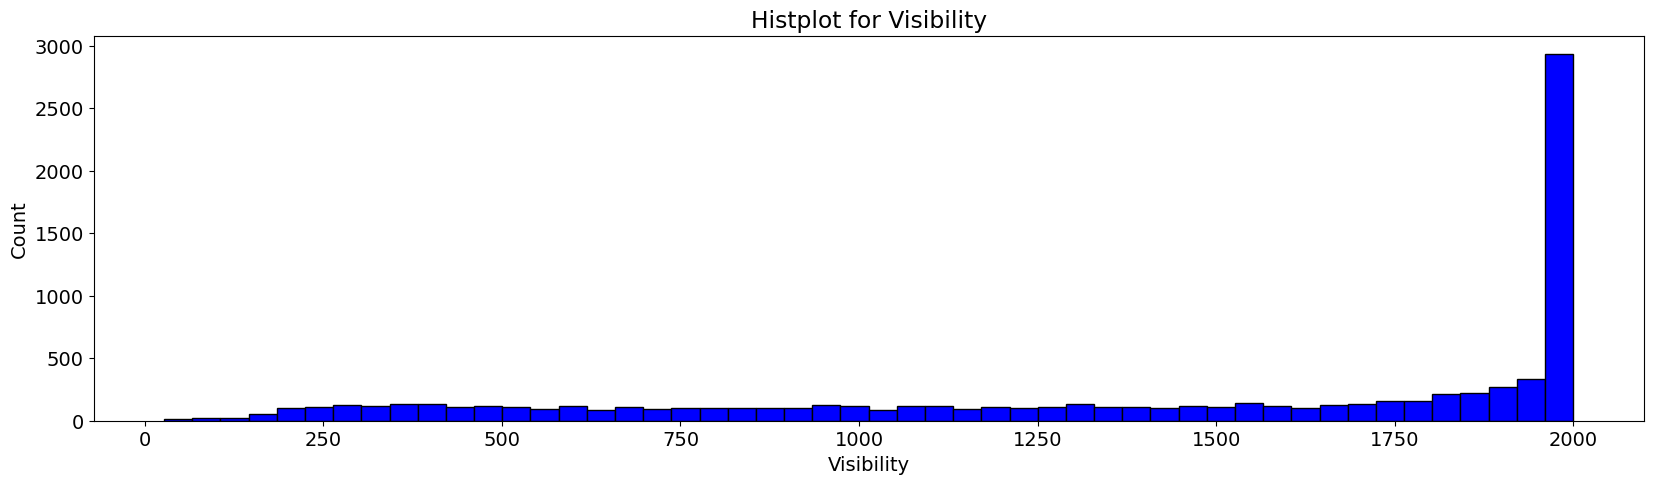

In [ ]:
# Chart - 9 visualization code

plt.hist(df['Visibility'], bins=50, color='blue', edgecolor='black')

plt.xlabel('Visibility')
plt.ylabel('Count')
plt.title('Histplot for Visibility')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram chart shows the quantitative of the visibility

##### 2. What is/are the insight(s) found from the chart?

Histogram chart shows the rental bikes are on huge demand when the visibility is 2000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When visibility is 2000 people prefer the most to rent bikes

#### Chart - 10

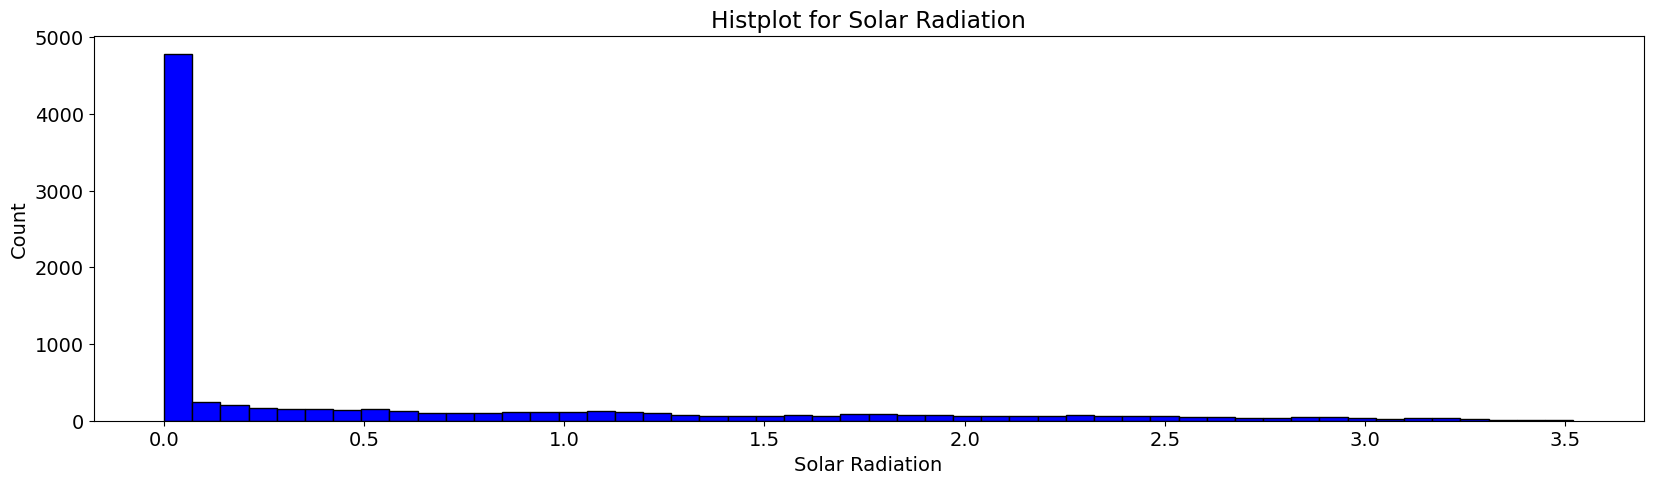

In [ ]:
# Chart - 10 visualization code

plt.hist(df['Solar Radiation'], bins=50, color='blue', edgecolor='black')

plt.xlabel('Solar Radiation')
plt.ylabel('Count')
plt.title('Histplot for Solar Radiation')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram chart shows the quantitave of rental bikes

##### 2. What is/are the insight(s) found from the chart?

Demand of rental bikes is on the low soalar radiation i.e 0.0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

people doesnt prefer to rent a bike when there is a solar radiation > 0.05

#### Chart - 11

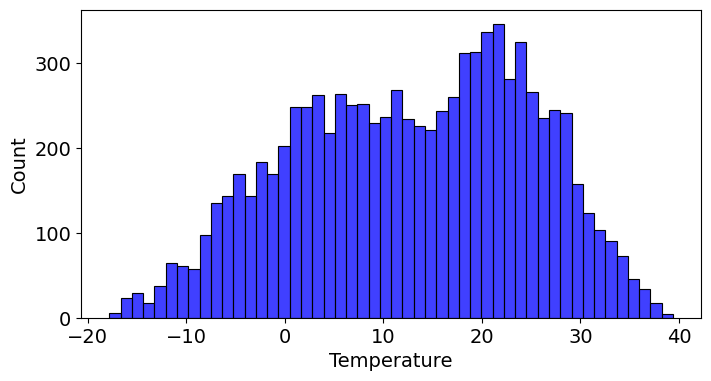

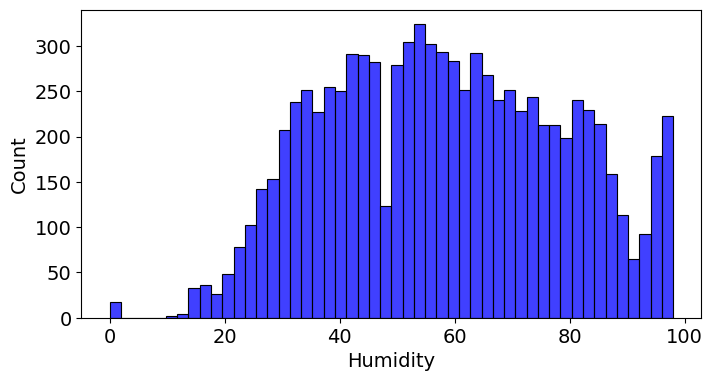

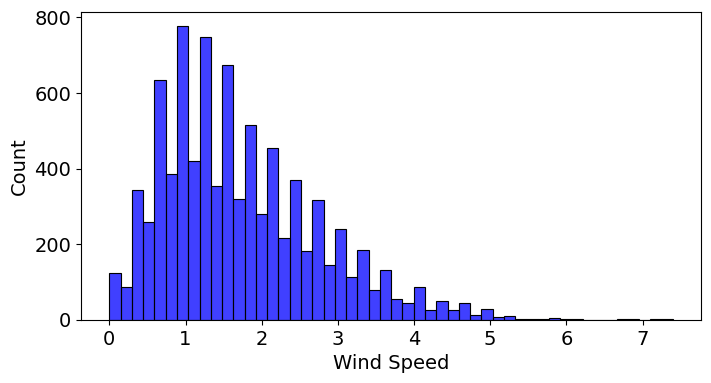

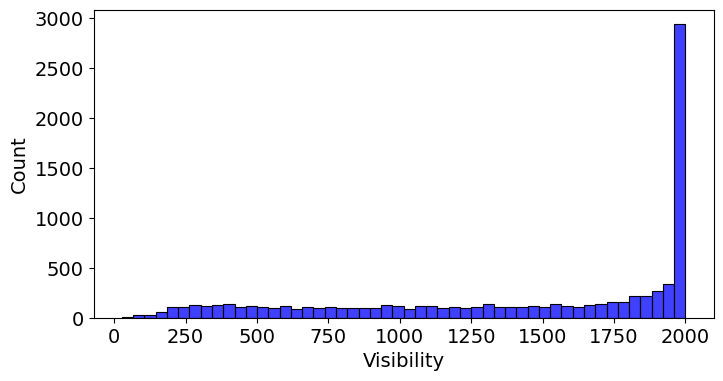

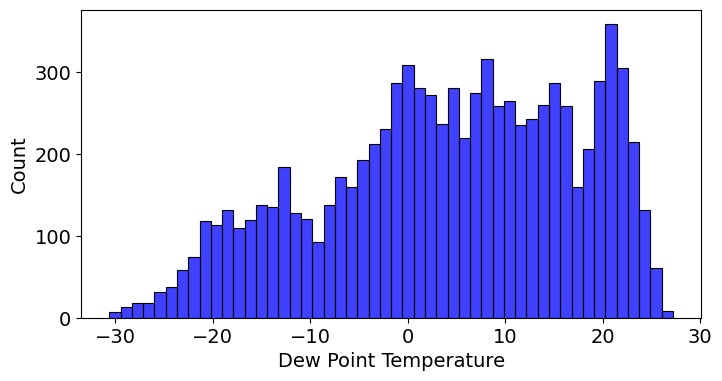

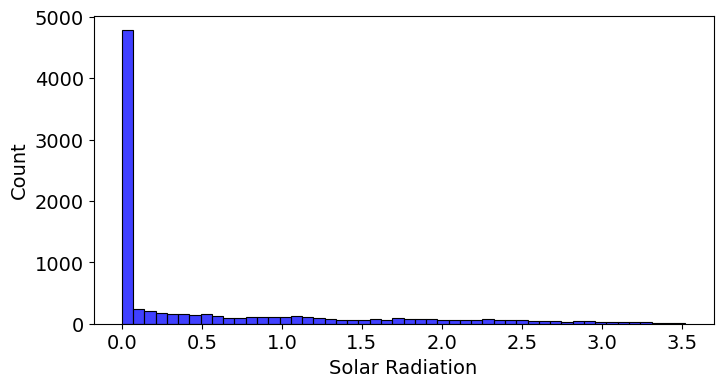

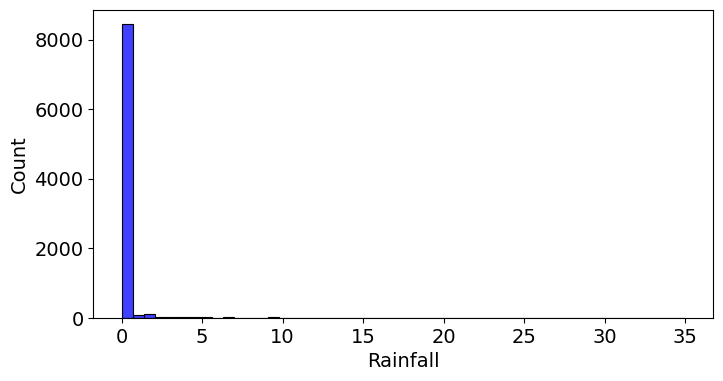

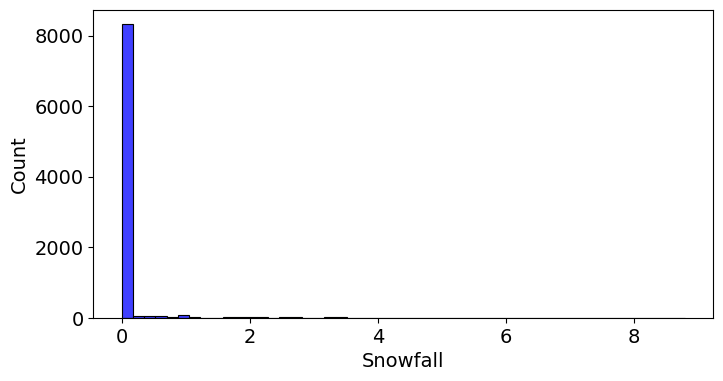

In [ ]:
# Chart - 11 visualization code
# Plotting displots to analyze the distribution of all numerical features

#assign the numerical coulmn to variable
selected_features = ['Temperature', 'Humidity','Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']


for col in selected_features:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col], bins=50, color='blue', edgecolor='black')
  plt.xlabel(col)
  plt.show

##### 1. Why did you pick the specific chart?

histogram shows the better quantitative of the feature

##### 2. What is/are the insight(s) found from the chart?

Various weather conditions were explored.
1. It is found that the temperature is normally distributed(-20 to 40)
2. Humidity is normaly distributed 0 to 90
3. wind speed is right skwed (0 - 7)
4. Visisbility is left skwed (0 - 2000)
5. dew point temperature is -30 t0 30
6. solar radiation is highly right skewed(0 - 3.5)
7. Rainfall is highly right skewed(0 -35)
8. Snowfall is highly right skewed(0-8)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have analysed the various weather conditions.

#### Chart - 12

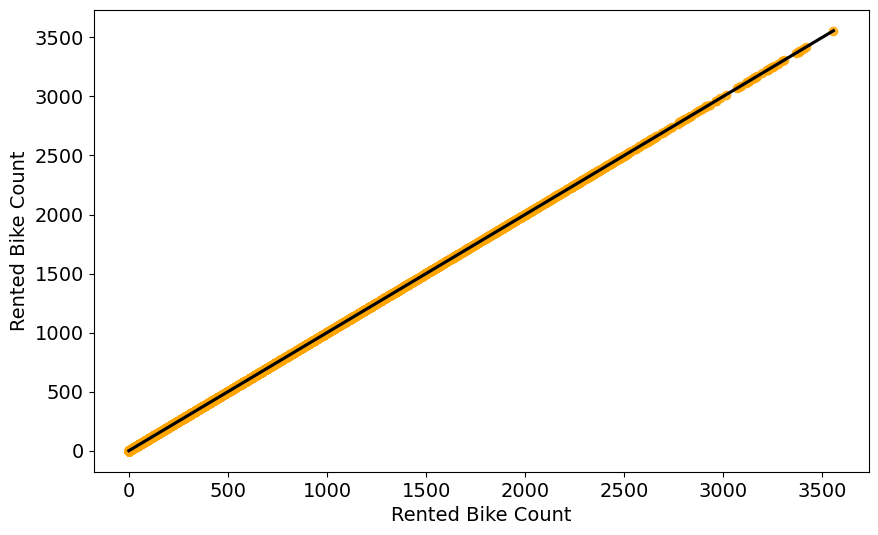

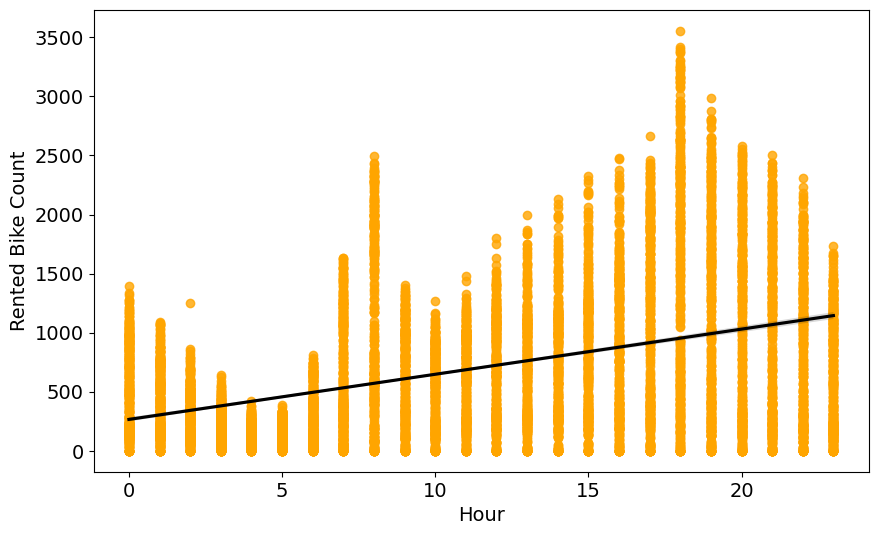

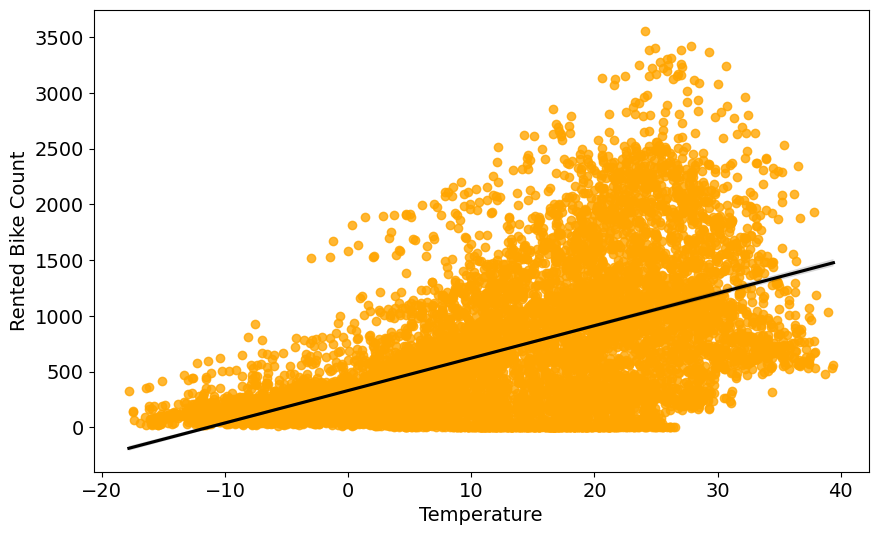

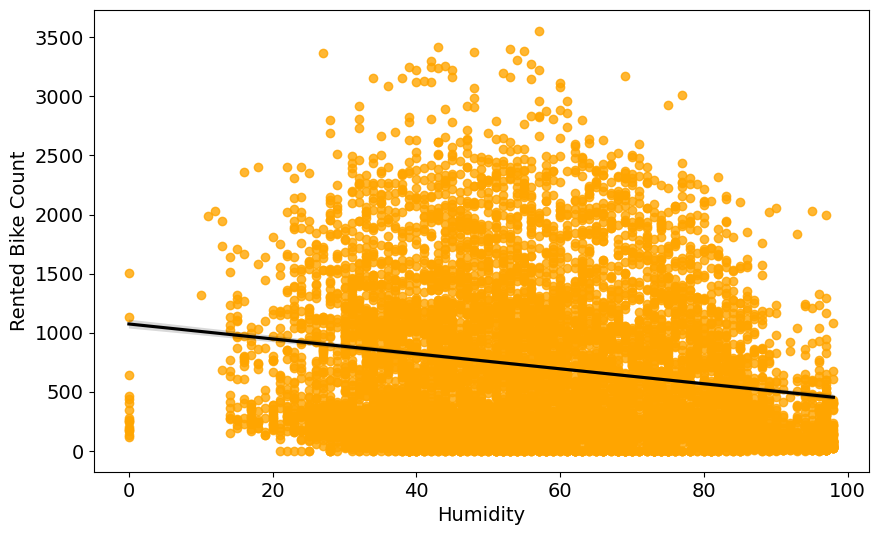

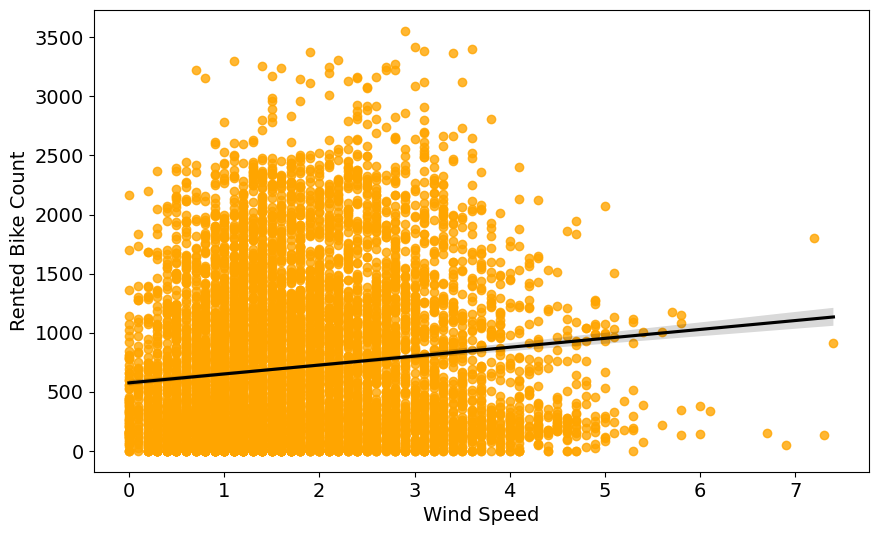

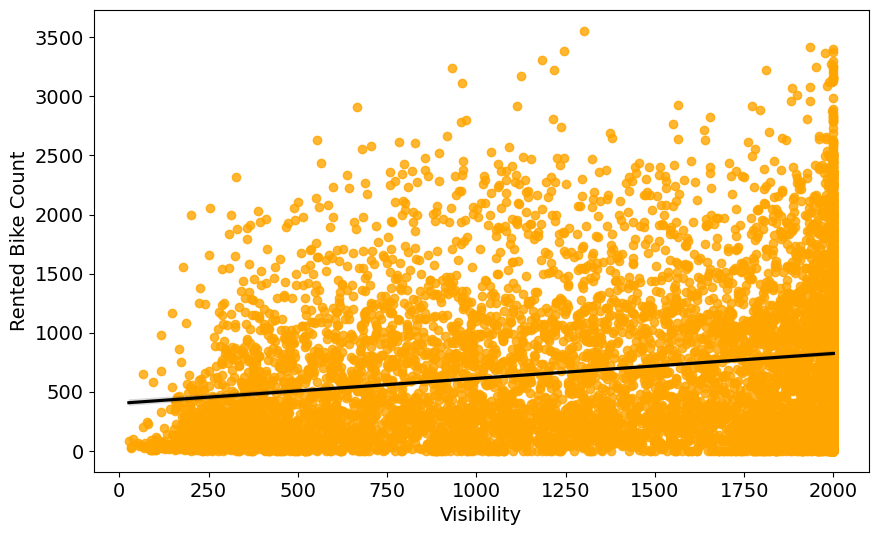

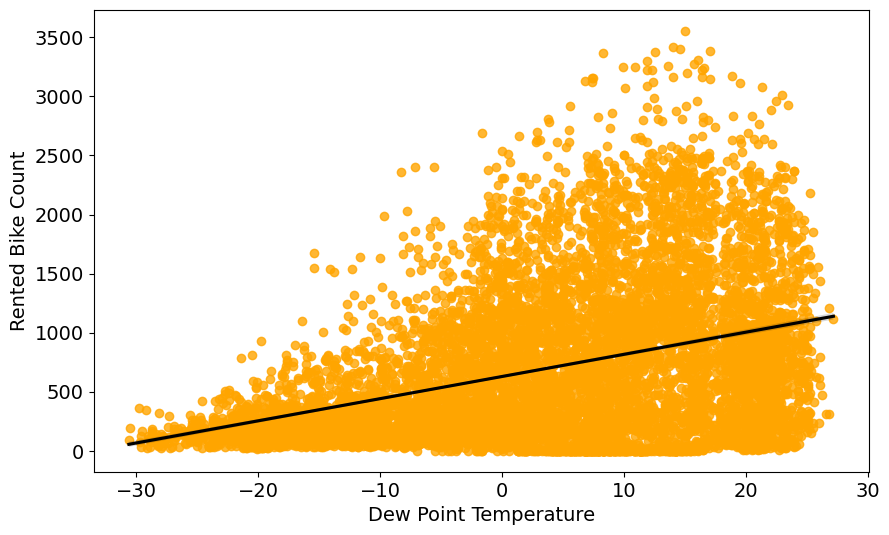

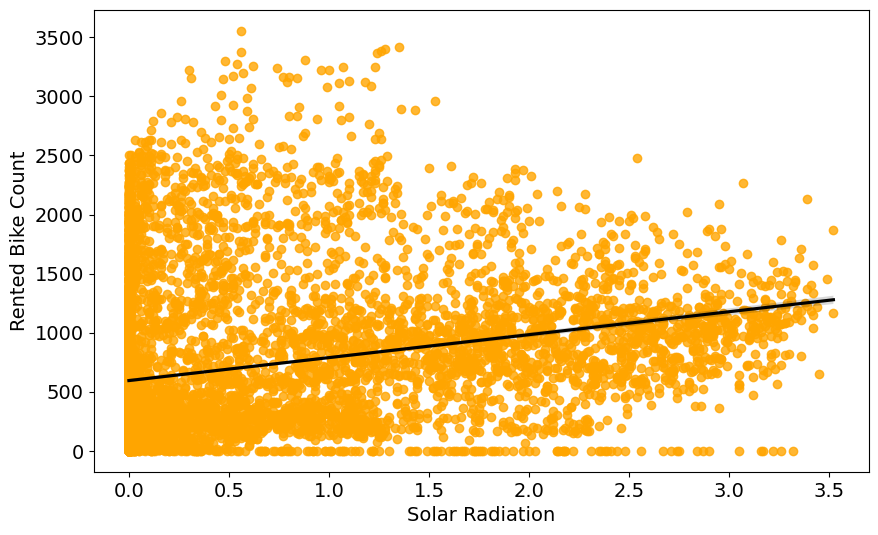

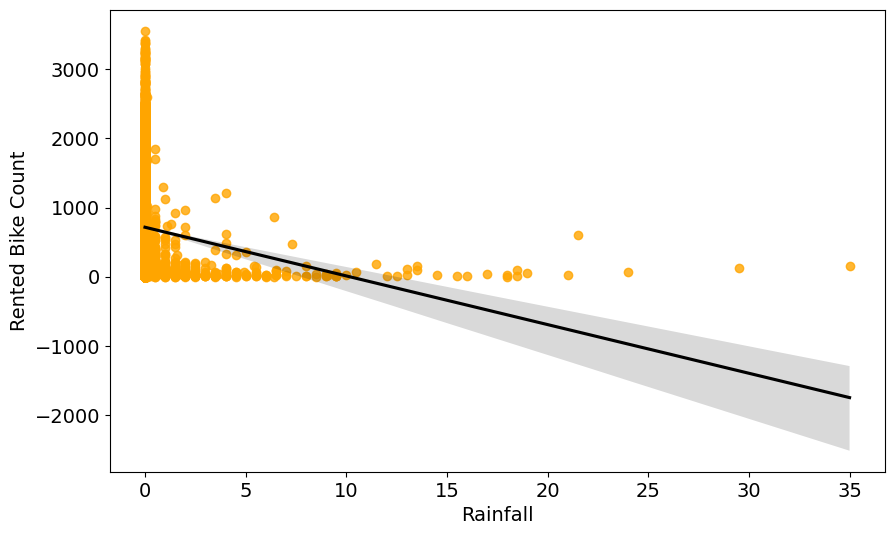

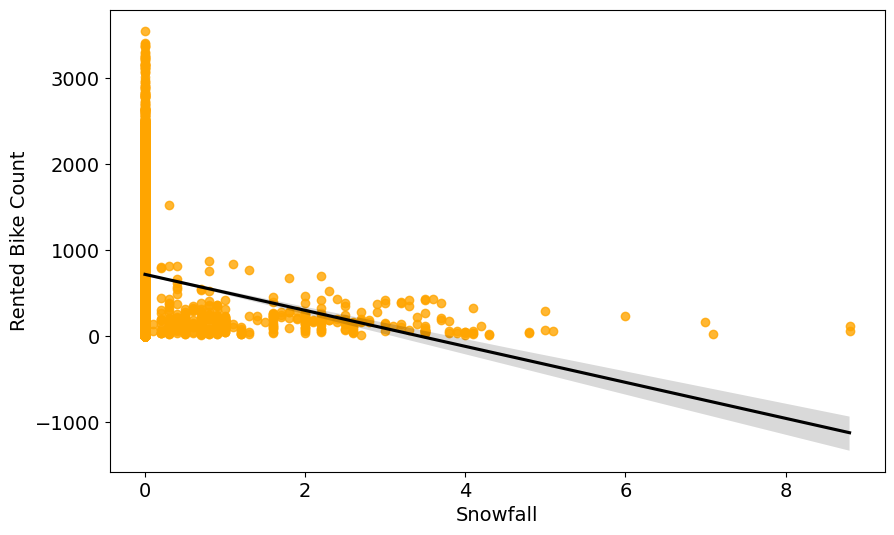

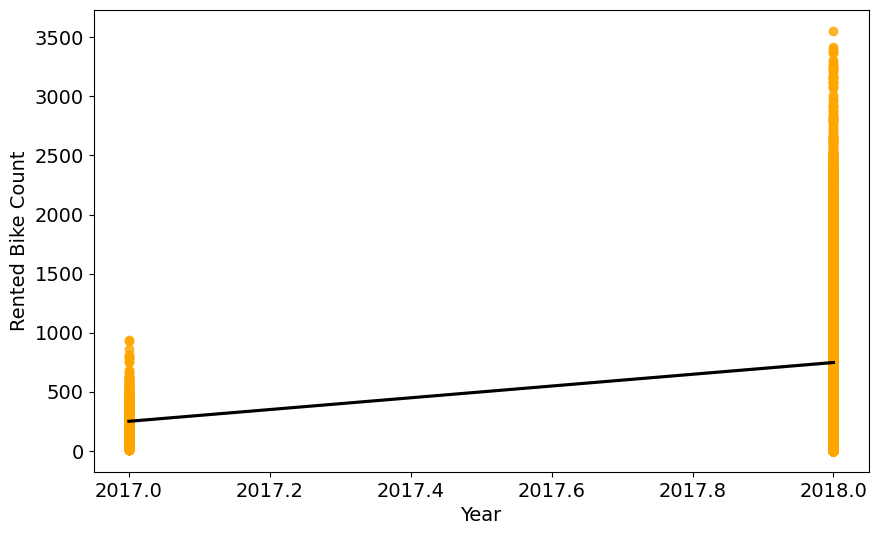

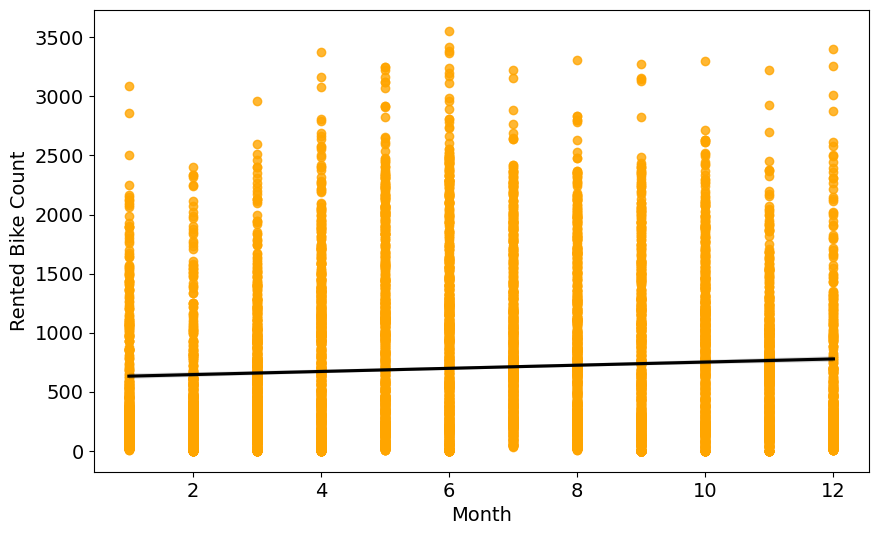

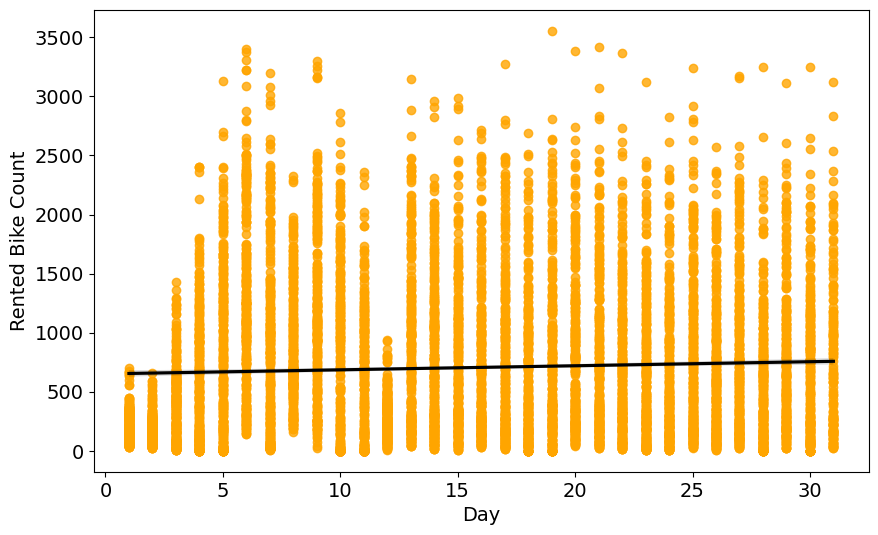

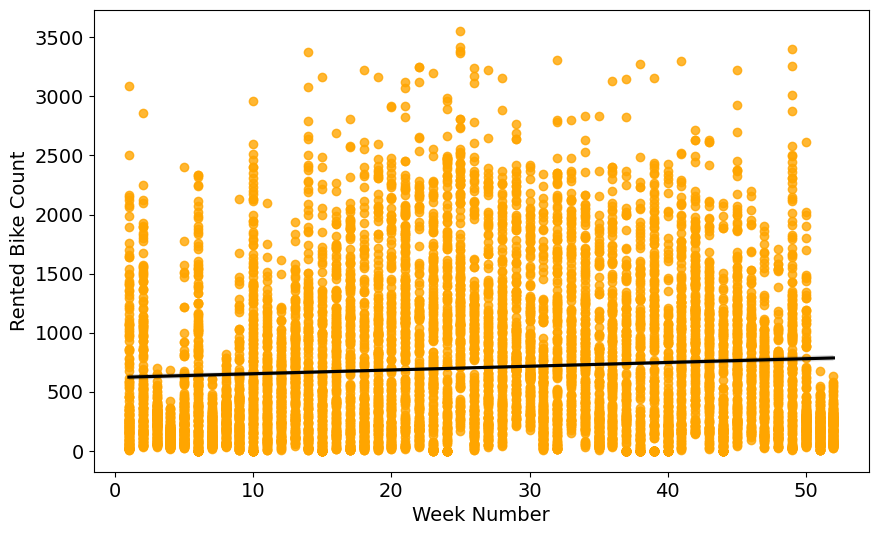

In [ ]:
# Chart - 12 visualization code
#printing the regression plot for all the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Linear Regression show the best fit line for the data i.e the avg increase in X with respect to Y

##### 2. What is/are the insight(s) found from the chart?

The insights we found are he following below

1. The increase in temperature(X) from -10 to 30 the demand of rental bikes increases(Y)

2. For the increse in humidity (X) the demand of renatl bikes decreases (Y)

3. For the increase in wind speed(X) from 0 to 3 the demand of rental bikes increases(Y)

4. The best line for visibilty(X) is not  showing any increase of rental bike(Y)

5. The best fit line for  the Dew point temperature is increasing (X) with respect to increase in rental bikes(X)

6. The best fit line for solar radiation (X)  normally increasing with repect to rental bikes

7. The best fit line for the snowfall and rainfall is decresing with respect to rental bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights for bussinees is the avg demand of rental bikes on the specific conditions of the environment

#### Chart - 13

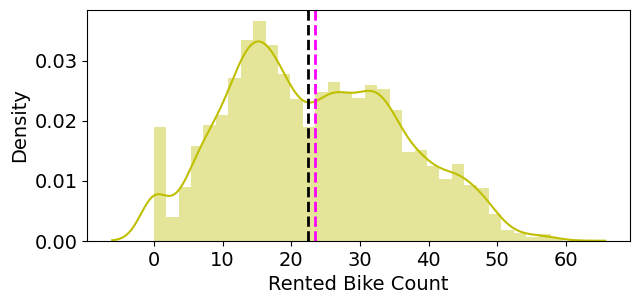

In [ ]:
# Chart - 13 visualization code

#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(7,3))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### 1. Why did you pick the specific chart?

The ditribution chart shows the ditributon of the rent bike counts

##### 2. What is/are the insight(s) found from the chart?

we found the mean and median distribution of the rented bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

mean and median are nearly equal on the rental bikes

#### Chart - 14 - Correlation Heatmap

Text(0.5, 20.722222222222214, 'Feature/Property')

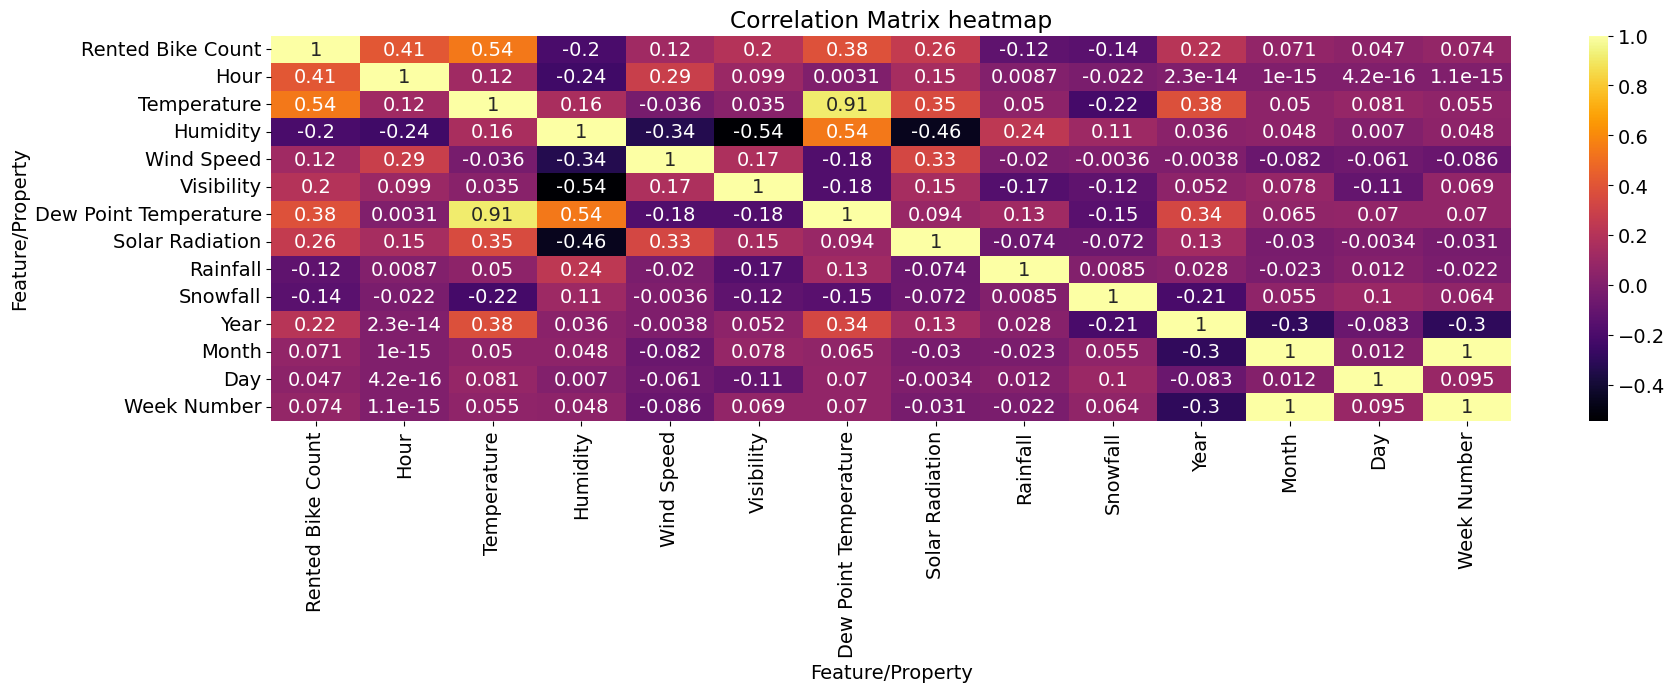

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

The corelation chart shows the relation between the two  specific feature

##### 2. What is/are the insight(s) found from the chart?

The corelation shows the insights of the relation between the two features describing from -1 to 1

1. The colser the value to +1 indicates that the two variables are positively correlated.
2. The closer the value to -1 indicates the tow variables are negativly correlated.

3. The closer the value towards 0 is less correlation between the two variables.

#### Chart - 15 - Pair Plot

Text(0.5, 0, 'Feature/Property')

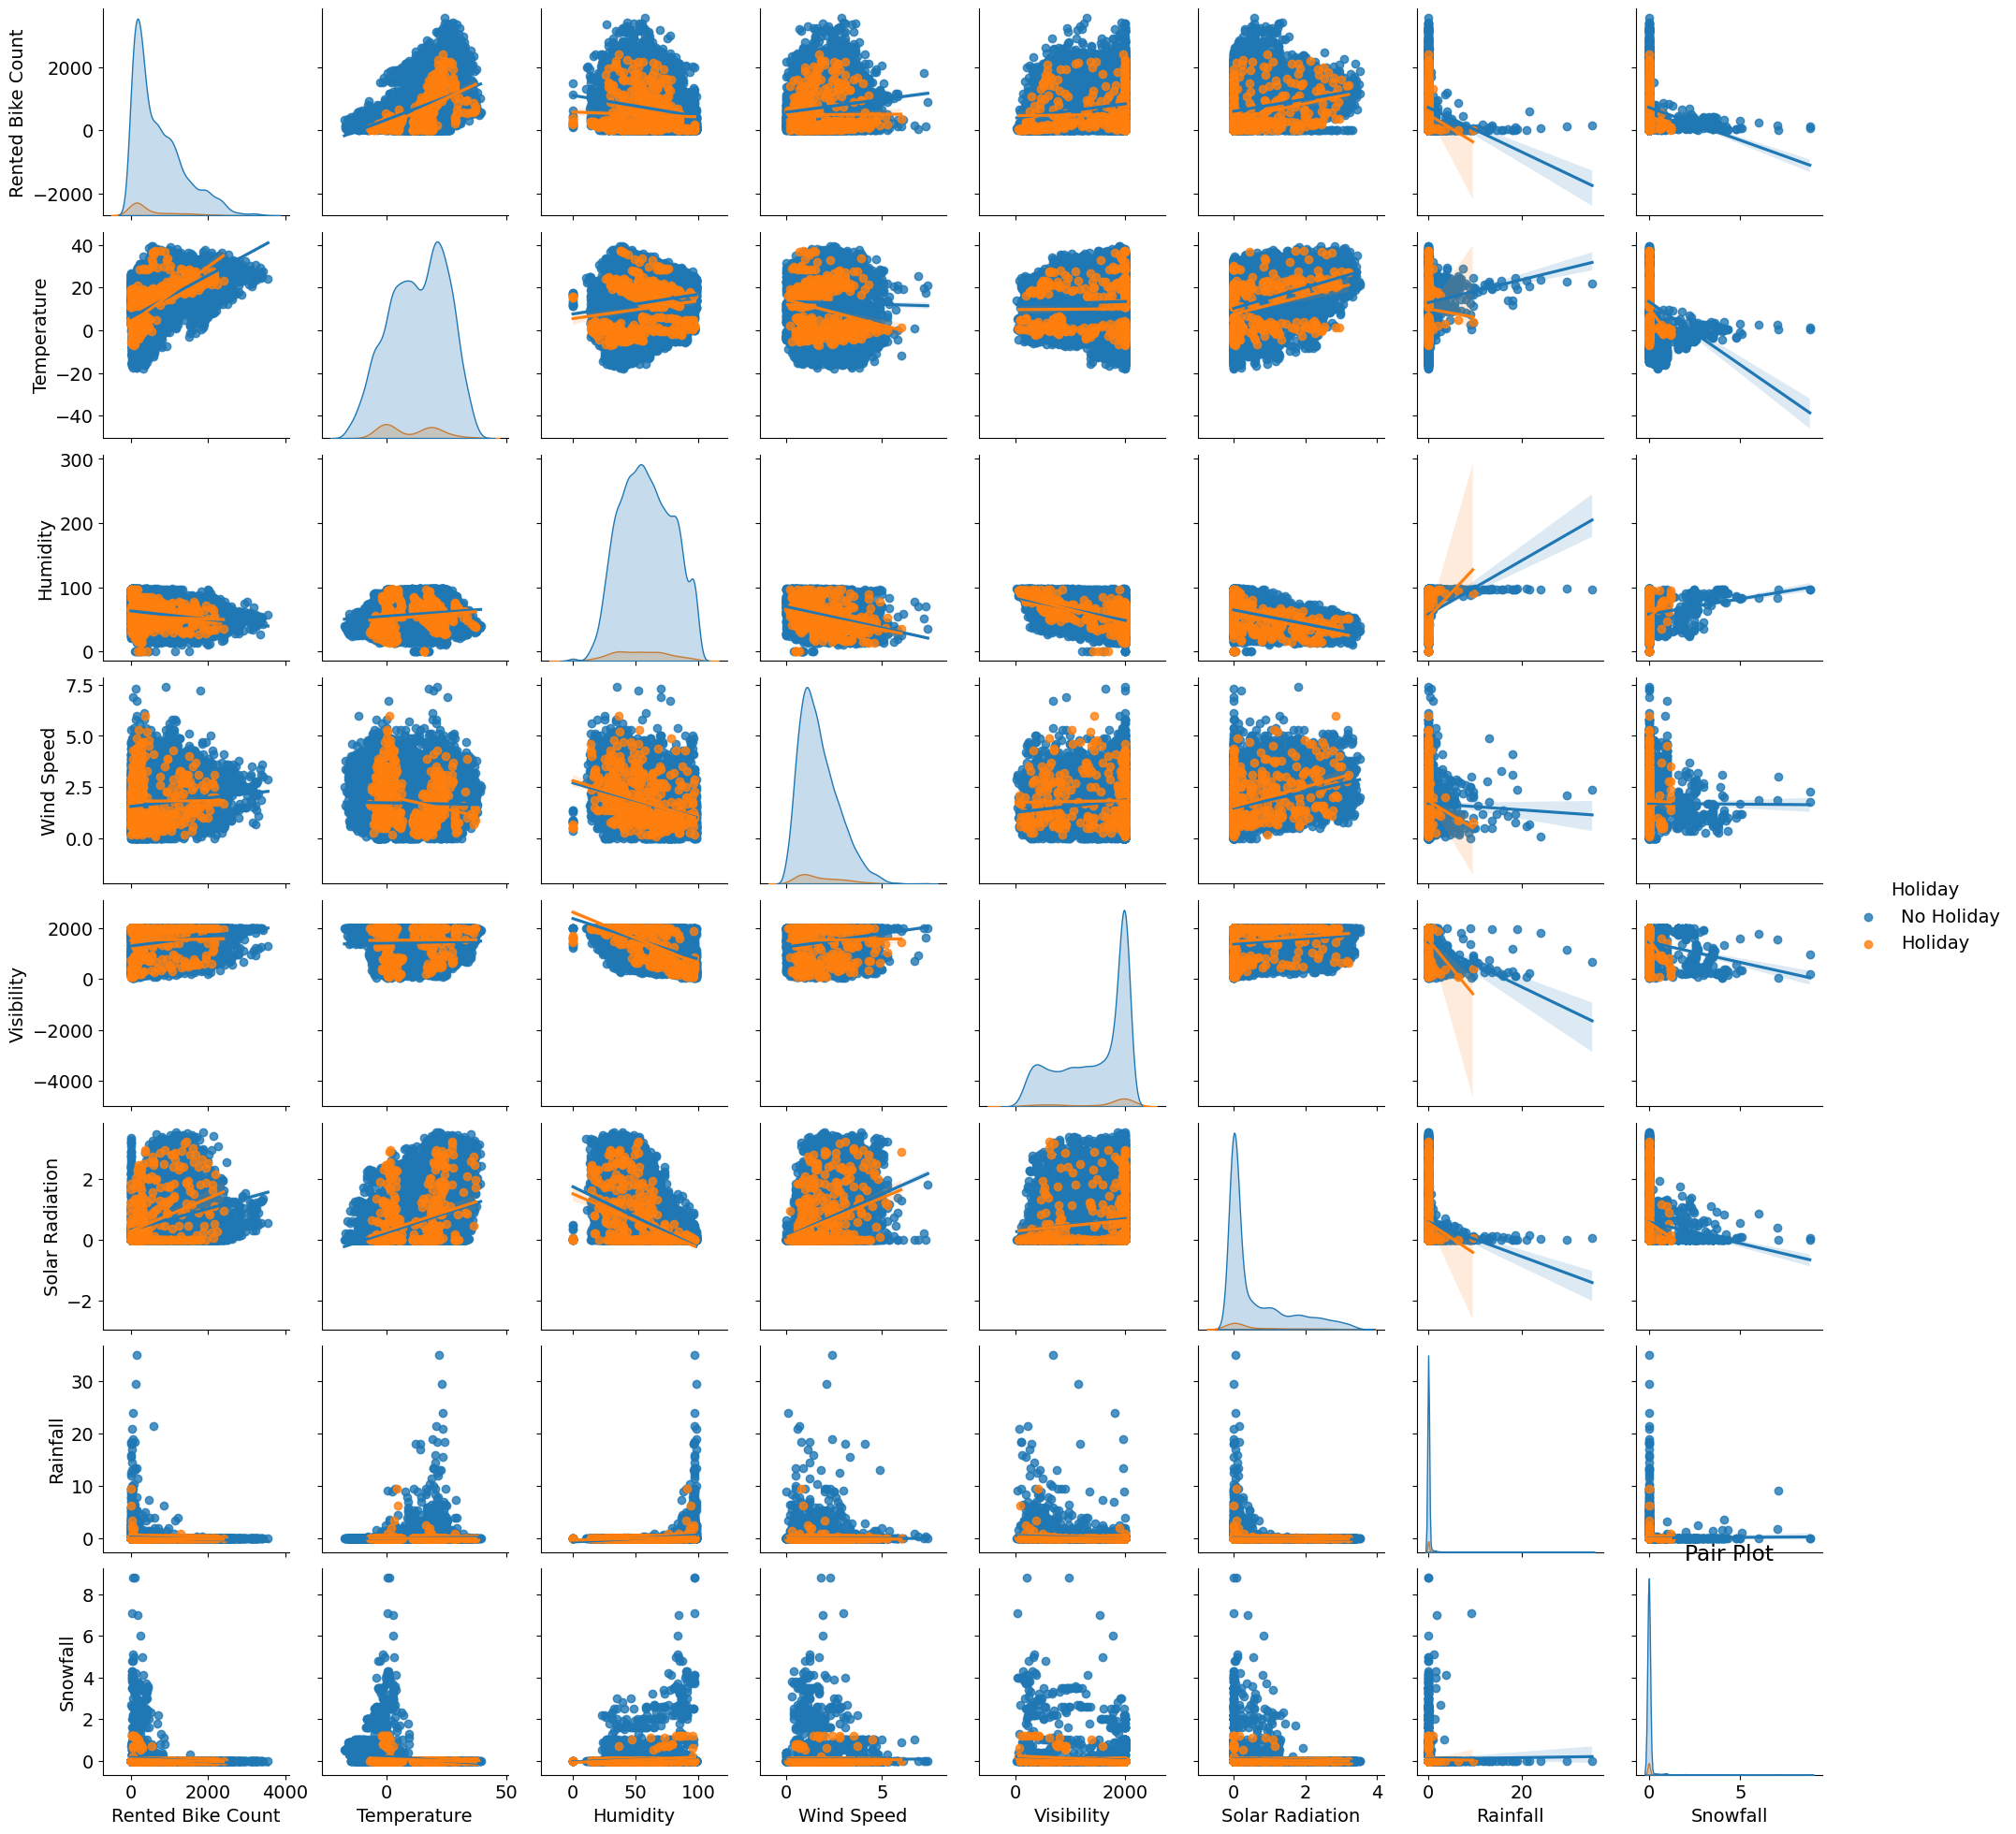

In [ ]:
# Pair Plot visualization code
selected_colums =['Rented Bike Count','Temperature', 'Humidity','Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday']
pair_plot_df = df[selected_colums]

# # same can be implemented using the below code
# pair_plot_df = df.copy()
# pair_plot_df.drop(columns = ['Year','Functioning Day', 'Month', 'Day', 'Hour', 'Seasons'], inplace=True)

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that there is a positive correlation beween wind speed and sloar radiation.

Temperature and rented bike count are highly corellated.

humidity and solar radiation are negativly corelated.



the diagonal graphs show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research hypothesis: The average bike count at any point of time is greater than 100.

> Null hypothesis H0: Average = 100.

> Alternate hypothesis Ha: Average > 100.

#### 2. Perform an appropriate statistical test.

In [ ]:
rented_bike_count_sample = df['Rented Bike Count'].sample(500)
rented_bike_count_mean = np.mean(rented_bike_count_sample)
rented_bike_count_std = np.std(rented_bike_count_sample)

In [ ]:
ts = (rented_bike_count_mean-100)/(rented_bike_count_std/(np.sqrt(500)))
ts

21.109863681728566

In [ ]:
# Calculating the probability
prob_z = norm.cdf(ts, 0, 1)
print(prob_z)

1.0


In [ ]:
p1 = 1-prob_z
p1

0.0

##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average bike count in city at any point of time is greater than 100.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average temperature at any point is grater than 10 degree Celsius.

>Null hypothesis H0: Average = 10.

>Alternate hypothesis Ha: Average > 10.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
temp_sample = df['Temperature'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample)

ts2 = (temp_mean-10)/(temp_std/(np.sqrt(500)))
ts2

6.203887684021374

In [ ]:
prob_z = norm.cdf(ts2, 0, 1)
print(prob_z)

0.9999999997245744


In [ ]:
p1 = 1-prob_z
p1

2.7542557123894085e-10

##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is 99%, so we have sufficient evidence to reject H0. Therefore, the average temperature at any point of time is greater than 10 degrees.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of humdidity is 20.

>Null hypothesis H0: Standard deviaiton != 20.

>Alternate hypothesis Ha: Standard deviaiton = 20.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
humid_sample = df['Humidity'].sample(50)
S2 = (np.std(humid_sample))**2

ts3 = (49 * S2)/(20*20)
ts3

59.16460899999999

In [ ]:
prob = chi2.cdf(ts3,49)
print(prob)

0.8484056035843939


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 45.53%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of humidity is 20.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# There were no missing values present in the database, no manipulations were done

# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Year                     0
Month                    0
Day                      0
Week Number              0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values present in the database, no manipulations were done

### 2. Handling Outliers

after investigating the and plotting box plots we found
1. Wind Speed
2. Solar Radiation
3. Rainfall
4. Snowfall

have got many outliers, but logically we found the values are actually within range and need not to  be clipped as the insites with the extreem values is important.

***The below code can be uncommented to handle the outliers.***

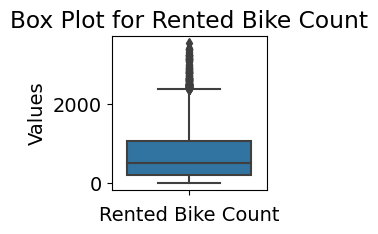

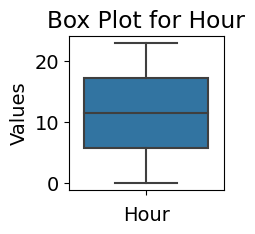

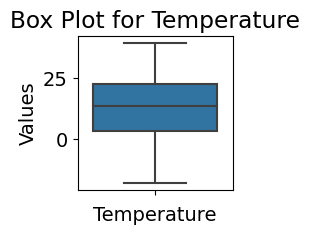

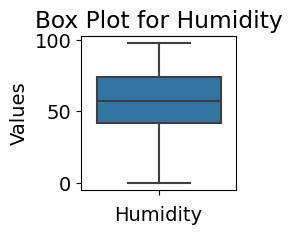

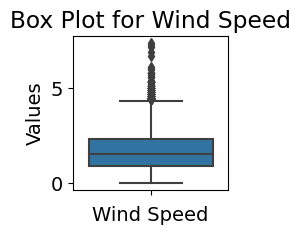

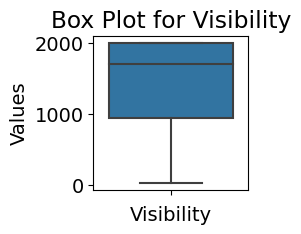

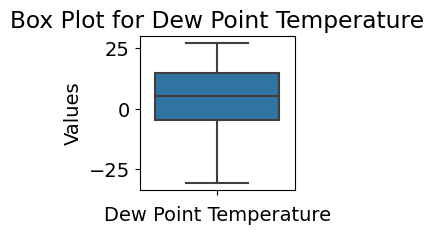

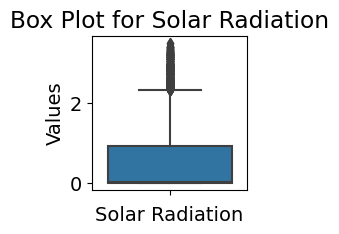

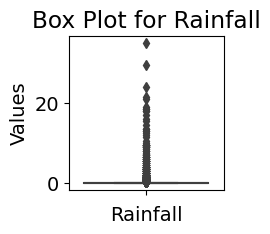

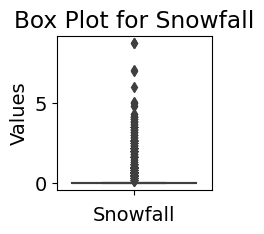

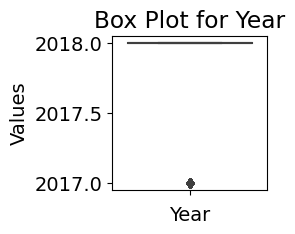

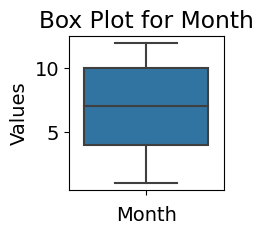

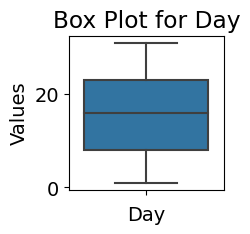

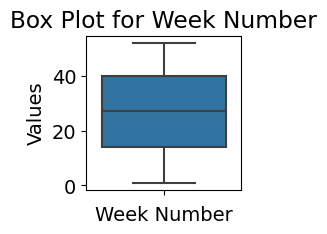

In [ ]:
# Handling Outliers & Outlier treatments
numerical_vars = df.describe().columns
for var in numerical_vars:
  plt.figure(figsize=(2, 2))
  sns.boxplot(y=var, data=df)
  plt.xlabel(var)
  plt.ylabel('Values')
  plt.title(f'Box Plot for {var}')
  plt.show()

In [ ]:
# Outliers are observed in the following columns
outliers_col=['Wind Speed','Solar Radiation','Rainfall','Snowfall']

#writing a function to handle outliers in the dataframe
def cliping_outliers(df1):
    for col in df1[outliers_col]:
        # using IQR method to define range of upper and lower limit.
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df1[col] = df1[col].clip(lower_bound, upper_bound)
    return df1


# calling the function and handeling outliers
df = cliping_outliers(df)

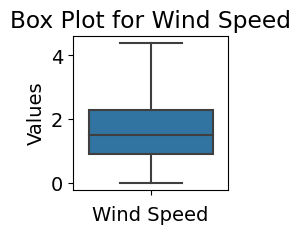

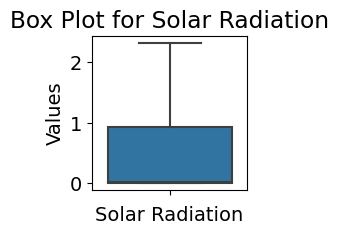

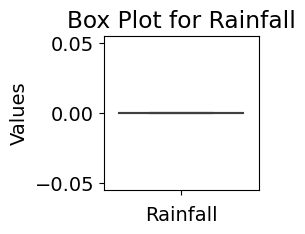

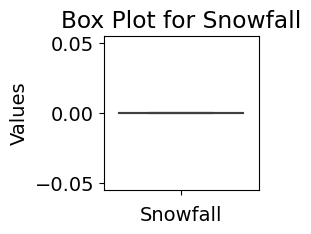

In [ ]:
# after handeling Outliers & Outlier treatments

for var in outliers_col:
  plt.figure(figsize=(2, 2))
  sns.boxplot(y=var, data=df)
  plt.xlabel(var)
  plt.ylabel('Values')
  plt.title(f'Box Plot for {var}')
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer here

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# convert object type data to dumy variables(binary form)

df['Winter']=np.where(df["Seasons"]=='Winter',1,0)
df['Spring']=np.where(df["Seasons"]=='Spring',1,0)
df['Summer']=np.where(df["Seasons"]=='Summer',1,0)
df['Autumn']=np.where(df["Seasons"]=='Autumn',1,0)

df['Holiday']=np.where(df["Holiday"]=='Holiday',1,0)
df['Functioning Day']=np.where(df['Functioning Day']=='Yes',1,0)

# Since Seasons is encoded into 4 new features we are dropping the orignal feature
df.drop('Seasons',axis=1, inplace = True)

x=['Month','Hour']
for i in x:
      df = pd.concat([df, pd.get_dummies(df[i], prefix=i, drop_first=True)], axis=1)
      df = df.drop([i], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind Speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew Point Temperature  8760 non-null   float64
 6   Solar Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Holiday                8760 non-null   int64  
 10  Functioning Day        8760 non-null   int64  
 11  Year                   8760 non-null   int64  
 12  Day                    8760 non-null   int64  
 13  Week Number            8760 non-null   int64  
 14  Winter                 8760 non-null   int64  
 15  Spri

#### What all categorical encoding techniques have you used & why did you use those techniques?

For Seaseons column we have created 4 new colums with respect to their categorical values, and encoded the same as 1 for equal values and 0 as other values.

example: for winter we have set as 1 in the winter column were as for other values we have encoded as 0

since we had 2 values for holiday and functioning day we have updated the same column as 0 and 1

we had 12 different values for Month and 24 values in hour we have used One hot encoding, and also dropping the first column of each encoded column. This method is an effective technique used to represent categorical variables as numerical values for a machine learning model.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# we did not come accross any textual data in our dataframe, No textual data preprocessings steps were done.

#### 2. Lower Casing

In [ ]:
# Lower Casing
# we have renamed the columns code comes here


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# was not an opyion in our dataframe

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# was not an opyion in our dataframe

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# was not an opyion in our dataframe

In [ ]:
# Remove White spaces
# was not an opyion in our dataframe

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# was not an opyion in our dataframe

#### 7. Tokenization

In [ ]:
# Tokenization
# was not an opyion in our dataframe

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# was not an opyion in our dataframe

##### Which text normalization technique have you used and why?

was not an opyion in our dataframe

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# was not an option in our dataframe

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# was not an option in our dataframe

##### Which text vectorization technique have you used and why?

was not an option in our dataframe

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

We have created some features in the data wrangling section

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# since day and week number are not correlated we are dropping them
df = df.drop(['Day', 'Week Number'],axis=1)

### removing multicollear
df['Total Temp'] = 0.7*df['Temperature'] + 0.3*df['Dew Point Temperature']
df=df.drop(['Temperature','Dew Point Temperature'],axis=1)


As we can see there is multicollinearity between the columns 'Temperature' & 'Dew Point Temperature'. Hence we are creating a new column as 0.7 x Temperature + 0.3 x Dew point Temprature as Total Temperature

##### What all feature selection methods have you used  and why?

1. In EDA we have carried out date column manipulation, we have created 3 new features using the date feature, where we extracted date, month and year
2. We have dropped dew drops features as we saw it coliner with temperature
3. Day and month are less colineraly related with rented bike count ie 0.04 and 0.07 respectively, so we droped them

##### Which all features you found important and why?

The remaining columns are equally important as they have average collineriaty between them

### 5. Data Transformation

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

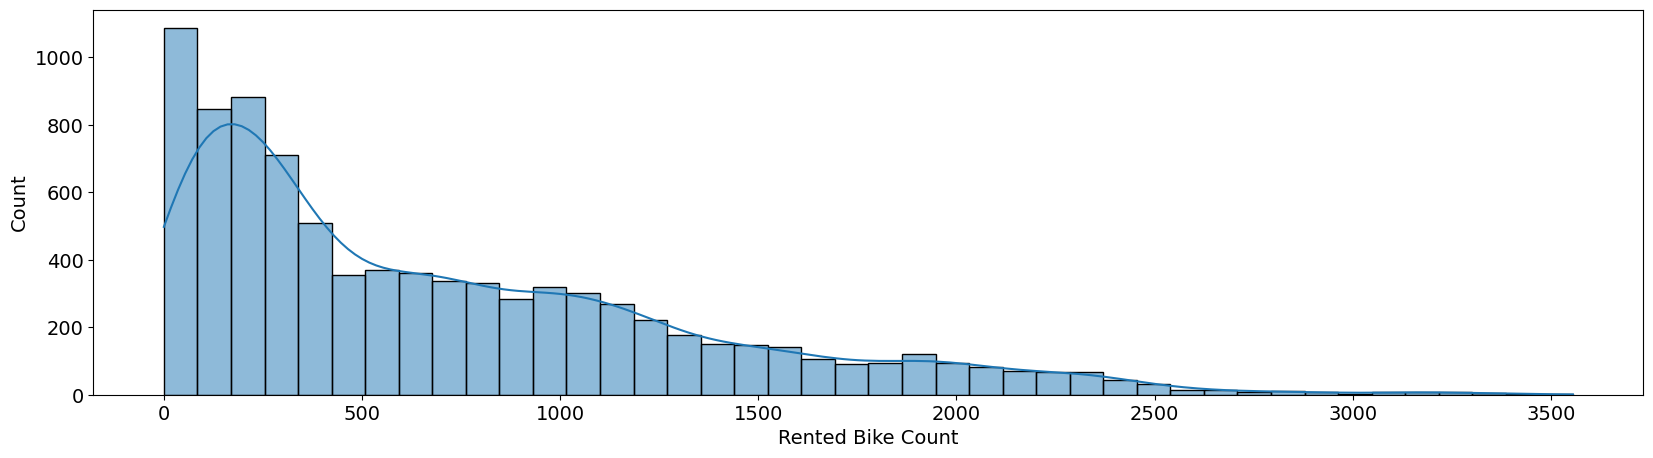

In [ ]:
sns.histplot(df['Rented Bike Count'],kde=True)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

after plotting hist plot we see that the rented bike count is Right skewed, so it is important to transform the data as seen in chart 13

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

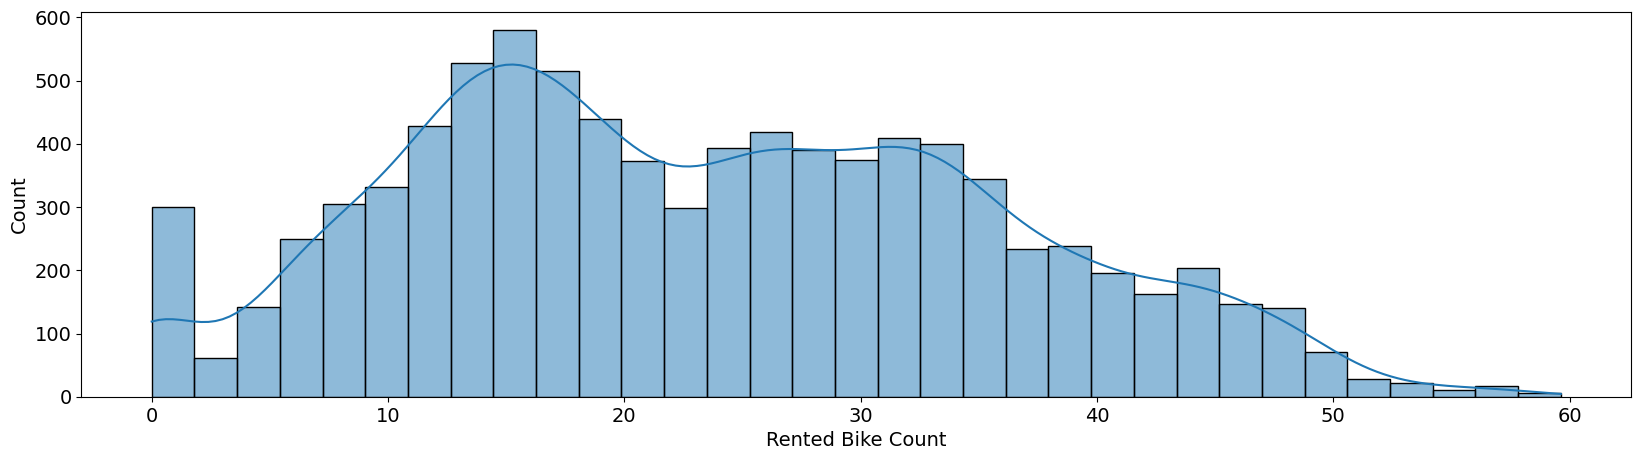

In [ ]:
# Transform Your data
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])
sns.histplot(df['Rented Bike Count'],kde=True)

### 6. Data Scaling

##### Which method have you used to scale you data and why?

we have used minmax scalar after spliting the data

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=4)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 48) (7008,)
(1752, 48) (1752,)


##### What data splitting ratio have you used and why?

As a standard practice we have split the data into 80-20 ratio.

### 9. Handling Imbalanced Dataset

Answer Here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

In [ ]:
# initiating test and train dictionary for future reference and comparing values
train={}
test={}

In [ ]:
# writing a function to copute all the required test stastics to interpret the results

def modelfit(model, X_train, X_test, y_train, y_test, output_name) :
  '''this function implements the given model calculates the stastics and add the results to train and test dictionaries
  '''
  # Fit the Algorithm
  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)
  print(f'The score for {output_name} is: {score}')

  # Predict on the model
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  print('\n')
  print('-'*50)
  print(f'metrics for {output_name} train data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_train), (y_pred_train))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_train), (y_pred_train))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_train, y_pred_train)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  # Formula => Adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - p - 1)]
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to train dictionary, for future refrences
  train[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  print('-'*50)
  print(f'metrics for {output_name} test data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_test), (y_pred_test))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_test), (y_pred_test))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_test, y_pred_test)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to test dictionary, for future refrences
  test[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  # plotting the actual vs. predicted values
  plt.figure(figsize=(10,5))
  plt.title(f'Actual vs. Predicted for {output_name}')
  plt.plot(np.array(y_pred_test))
  plt.plot(np.array((y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

### ML Model - 1

Linear Regression

The score for Linear Regression is: 0.8014093663736971


--------------------------------------------------
metrics for Linear Regression train data set
--------------------------------------------------
MSE : 0.44553917199159154
Mean absolute Error : 0.4926256599284653
RMSE : 0.6674872073617528
R2 : 0.8014093663736971
Adjusted R^2: 0.7958119791663791


--------------------------------------------------
metrics for Linear Regression test data set
--------------------------------------------------
MSE : 0.4637023678436342
Mean absolute Error : 0.5089397315110944
RMSE : 0.6809569500663271
R2 : 0.7993954951979901
Adjusted R^2: 0.7937413459140814




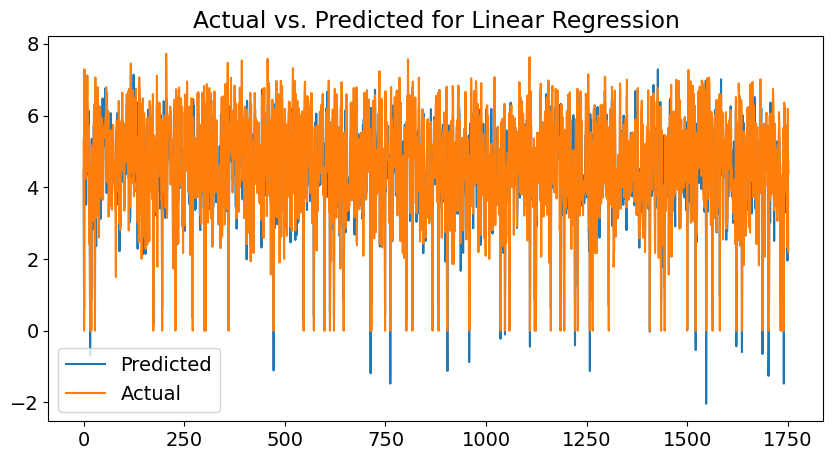

In [ ]:
# ML Model - 1 Implementation
LiReg = LinearRegression()
modelfit(LiReg, X_train, X_test, y_train, y_test, 'Linear Regression')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a statistical technique used to model the relationship between two variables, typically referred to as the independent variable (or predictor variable) and the dependent variable (or response variable). It assumes a linear relationship between these variables, where a change in the independent variable is associated with a constant change in the dependent variable.

The goal of linear regression is to estimate the parameters of the linear equation that best fits the observed data. The equation is typically represented as:

Y = mX + b

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Linear Regression doesnot need hyperparameter tuning

##### Which hyperparameter optimization technique have you used and why?

For Linear Regression we do not do Hyper parameter optimization

For Linear Regression we do not do Hyper parameter optimization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Adjusted R^2 on Train set is 0.8147645738100666

Adjusted R^2 on test set is 0.8180886844979192


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 2
# Lasso

The score for Lasso without Hyperparameter Tuning is: 0.2988261276999289


--------------------------------------------------
metrics for Lasso without Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 1.5730874149612202
Mean absolute Error : 0.8739879510893928
RMSE : 1.2542278162125173
R2 : 0.2988261276999289
Adjusted R^2: 0.2790631530255874


--------------------------------------------------
metrics for Lasso without Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 1.6992827617194792
Mean absolute Error : 0.9030670545575997
RMSE : 1.303565403698441
R2 : 0.2648651364051742
Adjusted R^2: 0.24414495234613032




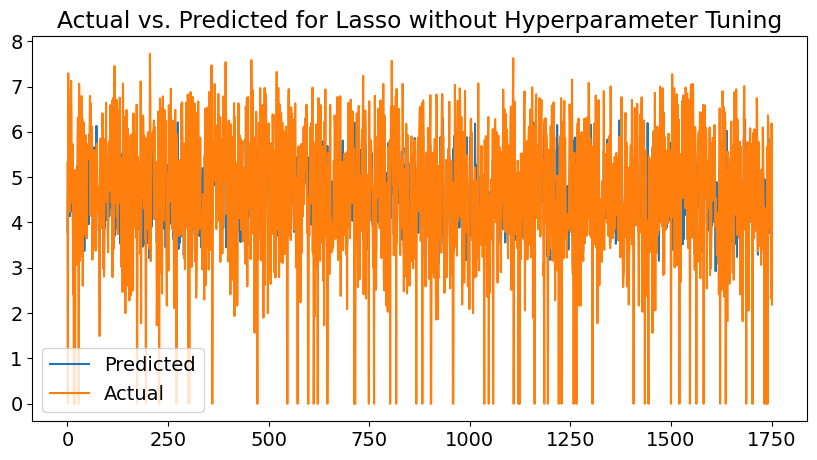

In [ ]:
lasso = Lasso()
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso without Hyperparameter Tuning')

In [ ]:
# ML Model - 2 Implementation

# Hyperparameter Tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print(f'The best fit alpha value is found out to be : {lasso_regressor.best_params_}')
print(f'Using {lasso_regressor.best_params_} the negative mean squared error is: {lasso_regressor.best_score_}')

The best fit alpha value is found out to be : {'alpha': 0.0001}
Using {'alpha': 0.0001} the negative mean squared error is: -0.45258070567661407


The score for Lasso with Hyperparameter Tuning is: 0.8013995032612179


--------------------------------------------------
metrics for Lasso with Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.44556129993834803
Mean absolute Error : 0.49255947670279476
RMSE : 0.6675037827146361
R2 : 0.8013995032612179
Adjusted R^2: 0.7958018380566017


--------------------------------------------------
metrics for Lasso with Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.4641072506267608
Mean absolute Error : 0.5090290238601802
RMSE : 0.6812541747591428
R2 : 0.799220336915772
Adjusted R^2: 0.793561250698483




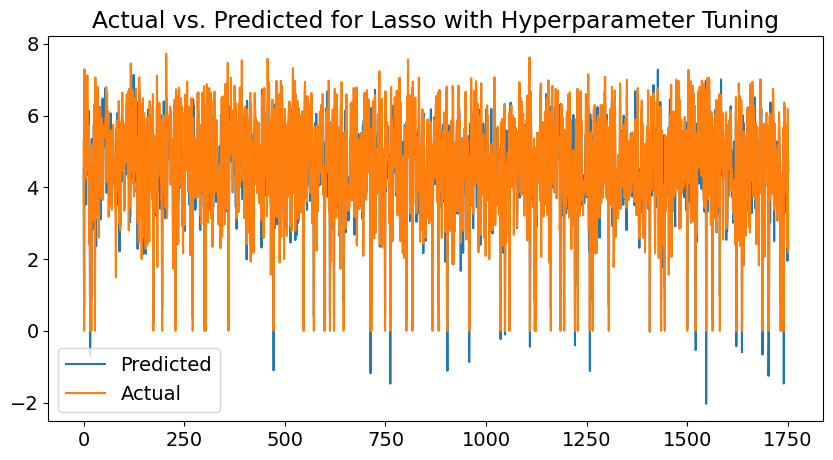

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso=Lasso(alpha=0.0001,max_iter=4000)
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso with Hyperparameter Tuning')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso, also known as L1 regularization, is a linear regression technique used in machine learning and statistics to prevent overfitting and select a subset of important features from a larger set of predictors. It adds a penalty term to the linear regression objective function, which is the absolute value of the coefficients multiplied by a tuning parameter called the regularization strength. This penalty encourages the model to shrink the coefficients of less important features to exactly zero, effectively eliminating them from the model. This results in a sparse model with a subset of predictors that are most relevant to the prediction task, making it useful for feature selection and model interpretability. Lasso is particularly effective when dealing with datasets that have a large number of predictors and may suffer from multicollinearity, as it can automatically perform feature selection and regularization simultaneously.



#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3
#Ridge

The score for Ridge without Hyperparameter Tuning is: 0.8013964577484036


--------------------------------------------------
metrics for Ridge without Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.44556813256299294
Mean absolute Error : 0.49286191692633385
RMSE : 0.6675089007369063
R2 : 0.8013964577484036
Adjusted R^2: 0.7957987067043186


--------------------------------------------------
metrics for Ridge without Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.46423965744144696
Mean absolute Error : 0.5094860485898647
RMSE : 0.681351346547027
R2 : 0.799163055768781
Adjusted R^2: 0.7935023550505786




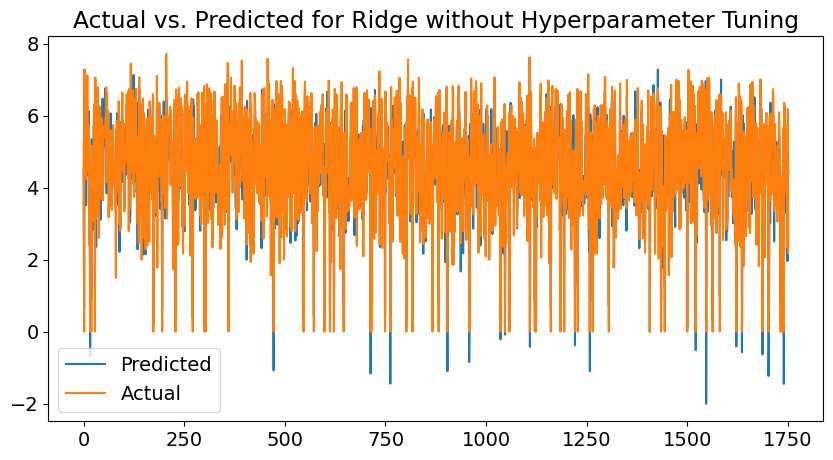

In [ ]:
ridge=Ridge()
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge without Hyperparameter Tuning')

In [ ]:
# ML Model - 3 Implementation
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.4544783668980869


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The score for Ridge with Hyperparameter Tuning is: 0.8013964577484036


--------------------------------------------------
metrics for Ridge with Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.44556813256299294
Mean absolute Error : 0.49286191692633385
RMSE : 0.6675089007369063
R2 : 0.8013964577484036
Adjusted R^2: 0.7957987067043186


--------------------------------------------------
metrics for Ridge with Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.46423965744144696
Mean absolute Error : 0.5094860485898647
RMSE : 0.681351346547027
R2 : 0.799163055768781
Adjusted R^2: 0.7935023550505786




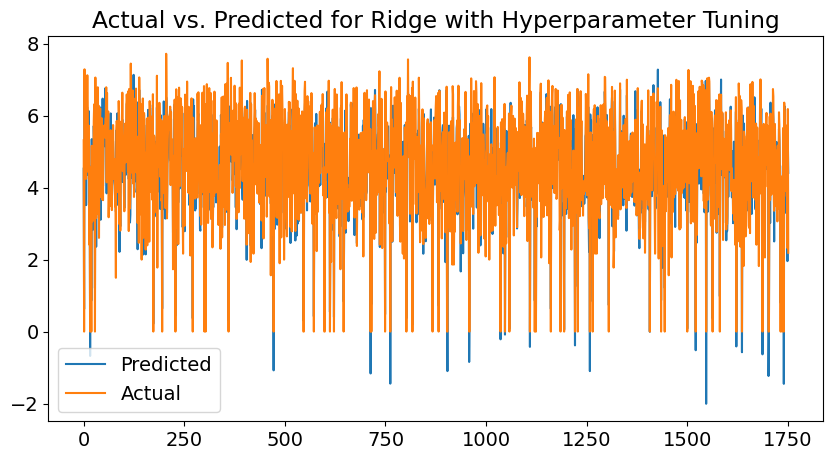

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge= Ridge(alpha=1)
# Fit the Algorithm
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge with Hyperparameter Tuning')

Ridge is a type of regularization technique used in machine learning, particularly in linear regression. It helps prevent overfitting by adding a penalty term to the loss function during model training. The penalty term is proportional to the square of the magnitude of the model's coefficients, which are the parameters that determine the relationship between input features and the predicted output. Ridge regularization encourages the model to use smaller coefficients, resulting in a simpler and more generalizable model. It is also known as L2 regularization because it adds the squared L2 norm of the coefficients to the loss function. Ridge can be tuned with a hyperparameter called the regularization strength, which controls the trade-off between fitting the data and regularizing the model. A higher regularization strength results in more regularization and a simpler model, while a lower regularization strength allows the model to fit the data more closely. Ridge is widely used in machine learning for regression tasks when dealing with multicollinearity or high-dimensional data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen

### ML Model 4
#ElasticNet

The score for ElasticNet is: 0.8009467557239872


--------------------------------------------------
metrics for ElasticNet train data set
--------------------------------------------------
MSE : 0.4465770415127396
Mean absolute Error : 0.49411304845574056
RMSE : 0.6682642003824083
R2 : 0.8009467557239872
Adjusted R^2: 0.7953363295788031


--------------------------------------------------
metrics for ElasticNet test data set
--------------------------------------------------
MSE : 0.4683790344701574
Mean absolute Error : 0.5120145856035556
RMSE : 0.6843822283418509
R2 : 0.7973723000241106
Adjusted R^2: 0.7916611258615489




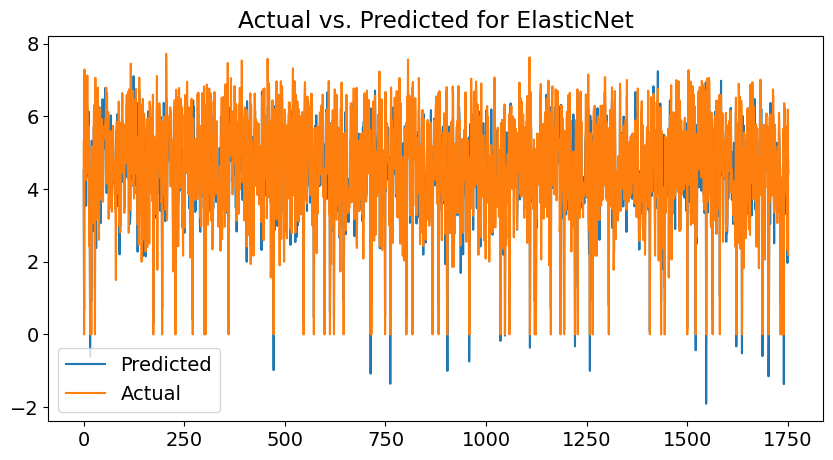

In [ ]:
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

modelfit(elasticnet, X_train, X_test, y_train, y_test, 'ElasticNet')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ElasticNet is a statistical method used for linear regression, which combines the L1 (Lasso) and L2 (Ridge) regularization techniques. It aims to overcome the limitations of both methods by adding a mixture of both penalties to the linear regression model. ElasticNet introduces two hyperparameters, alpha and l1_ratio, which control the strength of regularization and the balance between L1 and L2 regularization, respectively. This allows ElasticNet to handle multicollinearity in the data, select relevant features, and achieve better prediction performance compared to Lasso or Ridge alone. In summary, ElasticNet is a flexible regularization technique that combines the advantages of Lasso and Ridge regularization to improve linear regression models by preventing overfitting and improving model interpretability.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Elastic Net

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased comapred to linear regression

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model 5
# Random Forest

The score for Random Forest is: 0.9862577320165948


--------------------------------------------------
metrics for Random Forest train data set
--------------------------------------------------
MSE : 0.03083085333286317
Mean absolute Error : 0.1144060602310191
RMSE : 0.17558716733538124
R2 : 0.9862577320165948
Adjusted R^2: 0.9858703985678553


--------------------------------------------------
metrics for Random Forest test data set
--------------------------------------------------
MSE : 0.24484274574021936
Mean absolute Error : 0.3131316874343203
RMSE : 0.4948158705419819
R2 : 0.8940774057463002
Adjusted R^2: 0.8910919186504825




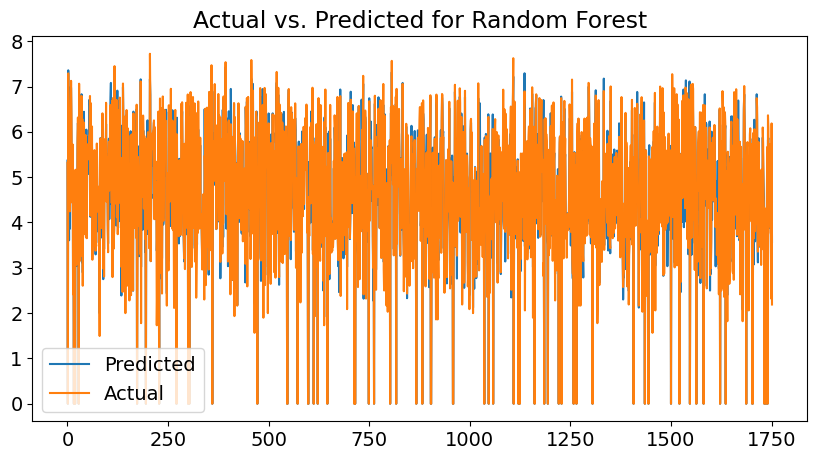

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
modelfit(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble method that combines multiple decision trees to make more accurate predictions. The algorithm creates a "forest" of decision trees by randomly selecting a subset of features and data samples from the training dataset. Each tree in the forest is trained independently on these subsets, and their predictions are combined to obtain the final output.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement seen

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML model 6
# Support Vector Regressor
(just to check its performance on regression task)

The score for Support Vector Regressor is: 0.12030547717875673


--------------------------------------------------
metrics for Support Vector Regressor train data set
--------------------------------------------------
MSE : 1.9735994701585136
Mean absolute Error : 1.0600583534712587
RMSE : 1.404848557730873
R2 : 0.12030547717875673
Adjusted R^2: 0.09551079890781144


--------------------------------------------------
metrics for Support Vector Regressor test data set
--------------------------------------------------
MSE : 2.048875753646334
Mean absolute Error : 1.0754793149121198
RMSE : 1.4313894486289656
R2 : 0.11362603587207454
Adjusted R^2: 0.08864309384145763




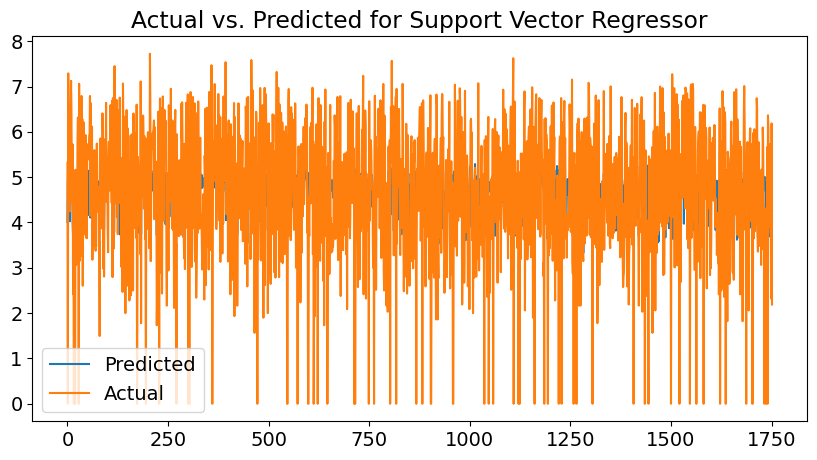

In [ ]:
from sklearn.svm import SVR
support_vector = SVR(kernel = 'rbf')
modelfit(support_vector, X_train, X_test, y_train, y_test, 'Support Vector Regressor')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Regressor (SVR) is a supervised machine learning algorithm used for regression tasks. It is based on the Support Vector Machine (SVM) algorithm, which is commonly used for classification tasks. SVR is designed to predict continuous numerical values rather than discrete classes.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Support vector Regressor

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

it is found that this model fails drastically

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

it is found that this model fails drastically

### ML model 7
# Decision Tree Regressor

The score for Decision Tree Regressor is: 1.0


--------------------------------------------------
metrics for Decision Tree Regressor train data set
--------------------------------------------------
MSE : 0.0
Mean absolute Error : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R^2: 1.0


--------------------------------------------------
metrics for Decision Tree Regressor test data set
--------------------------------------------------
MSE : 0.45793365111878714
Mean absolute Error : 0.41735716701531395
RMSE : 0.6767079511272105
R2 : 0.8018911274012772
Adjusted R^2: 0.7963073188958523




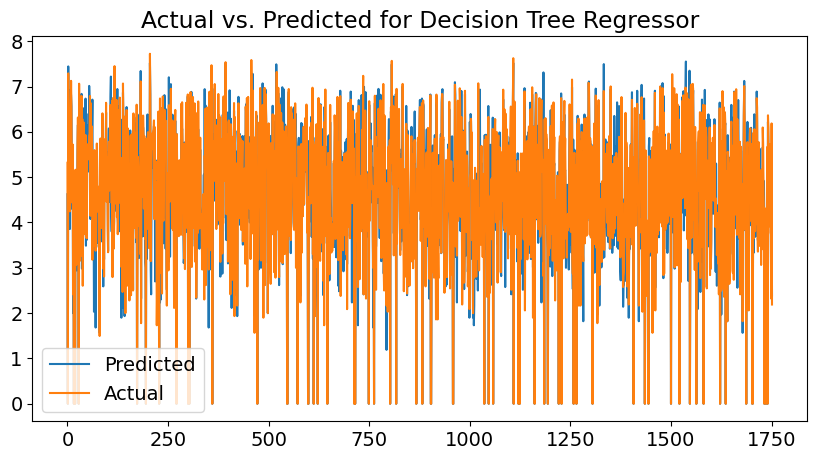

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
modelfit(dtr, X_train, X_test, y_train, y_test, 'Decision Tree Regressor')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree Regressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous target variable. It works by recursively splitting the feature space into subsets based on the values of input features, and then predicting the target value for each subset. The splits are determined based on a set of predefined rules or criteria, such as minimizing the variance of the target variable or maximizing the information gain. The resulting tree-like structure allows for easy interpretation and visualization. Decision Tree Regressor can handle both numerical and categorical features, and is capable of capturing non-linear relationships between features and the target variable. However, it is prone to overfitting and may not perform well on complex datasets with noisy or sparse data. Regularization techniques, such as pruning or setting maximum depth, can be applied to mitigate overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Decision Tree Regressor

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased comapred to Random Forest

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
features = x.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

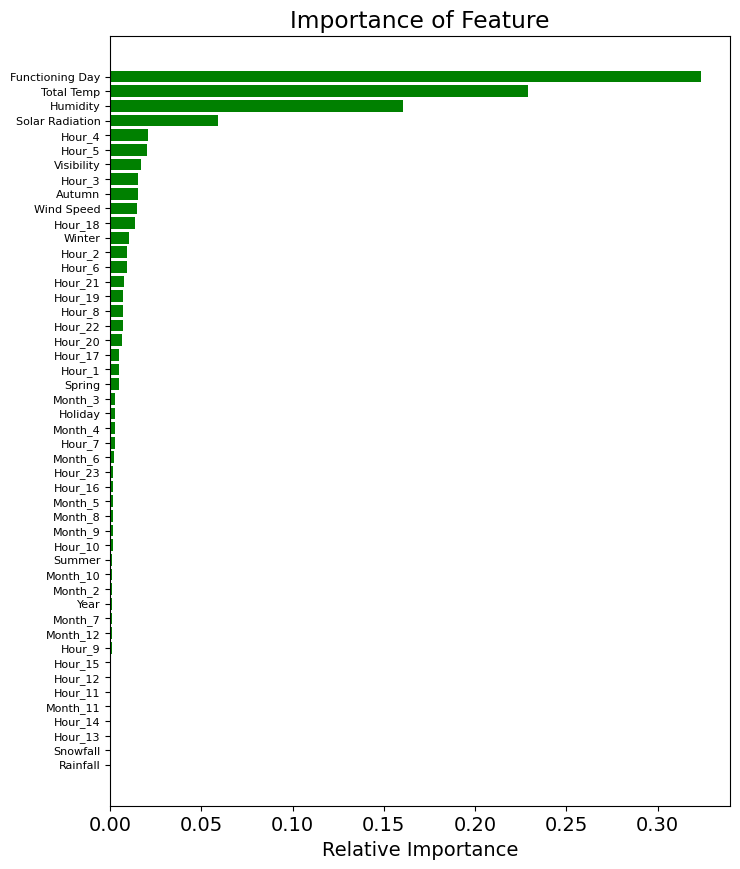

In [ ]:
#Plotting figure
plt.figure(figsize=(8,10))
plt.title('Importance of Feature')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 8)
plt.xlabel('Relative Importance')

plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# # Save the File
import pickle
pickle_path = dir_path + 'RandomForestRegressor.pkl'

# serialize process (wb=write byte)
pickle.dump(rf_model, open(pickle_path,'wb'))
# Assuming you have trained and saved your machine learning model in the 'model' variable


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


# Load the saved model from the pickle file
Regression_model= pickle.load(open(pickle_path,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

array([5.36509176, 0.        , 7.35750121, ..., 2.65691281, 5.57487538,
       3.57564203])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In [ ]:
# converting the test and train stastics into a dataframe
Test=pd.DataFrame(test,index=["Test MSE", 'Test MAE', "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", 'Train MAE', "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [ ]:
result_df = pd.concat([Train, Test], axis=0)
result_df.transpose()

Train MSE  Train MAE  Train RMSE  \
Linear Regression                     0.445539   0.492626    0.667487   
Lasso without Hyperparameter Tuning   1.573087   0.873988    1.254228   
Lasso with Hyperparameter Tuning      0.445561   0.492559    0.667504   
Ridge without Hyperparameter Tuning   0.445568   0.492862    0.667509   
Ridge with Hyperparameter Tuning      0.445568   0.492862    0.667509   
ElasticNet                            0.446577   0.494113    0.668264   
Random Forest                         0.030831   0.114406    0.175587   
Support Vector Regressor              1.973599   1.060058    1.404849   
Decision Tree Regressor               0.000000   0.000000    0.000000   

                                     Train R^2  Train Adjusted R^2  Test MSE  \
Linear Regression                     0.801409            0.795812  0.463702   
Lasso without Hyperparameter Tuning   0.298826            0.279063  1.699283   
Lasso with Hyperparameter Tuning      0.801400            0.795802  0.464107   
Ridge without Hyperparameter Tuning   0.801396            0.795799  0.464240   
Ridge with Hyperparameter Tuning      0.801396            0.795799  0.464240   
ElasticNet                            0.800947            0.795336  0.468379   
Random Forest                         0.986258            0.985870  0.244843   
Support Vector Regressor              0.120305            0.095511  2.048876   
Decision Tree Regressor               1.000000            1.000000  0.457934   

                                     Test MAE  Test RMSE  Test R^2  \
Linear Regression                    0.508940   0.680957  0.799395   
Lasso without Hyperparameter Tuning  0.903067   1.303565  0.264865   
Lasso with Hyperparameter Tuning     0.509029   0.681254  0.799220   
Ridge without Hyperparameter Tuning  0.509486   0.681351  0.799163   
Ridge with Hyperparameter Tuning     0.509486   0.681351  0.799163   
ElasticNet                           0.512015   0.684382  0.797372   
Random Forest                        0.313132   0.494816  0.894077   
Support Vector Regressor             1.075479   1.431389  0.113626   
Decision Tree Regressor              0.417357   0.676708  0.801891   

                                     Test Adjusted R^2  
Linear Regression                             0.793741  
Lasso without Hyperparameter Tuning           0.244145  
Lasso with Hyperparameter Tuning              0.793561  
Ridge without Hyperparameter Tuning           0.793502  
Ridge with Hyperparameter Tuning              0.793502  
ElasticNet                                    0.791661  
Random Forest                                 0.891092  
Support Vector Regressor                      0.088643  
Decision Tree Regressor                       0.796307

In [ ]:
# Viewing the data fro train
Train.transpose()

Train MSE  Train MAE  Train RMSE  \
Linear Regression                     0.445539   0.492626    0.667487   
Lasso without Hyperparameter Tuning   1.573087   0.873988    1.254228   
Lasso with Hyperparameter Tuning      0.445561   0.492559    0.667504   
Ridge without Hyperparameter Tuning   0.445568   0.492862    0.667509   
Ridge with Hyperparameter Tuning      0.445568   0.492862    0.667509   
ElasticNet                            0.446577   0.494113    0.668264   
Random Forest                         0.030831   0.114406    0.175587   
Support Vector Regressor              1.973599   1.060058    1.404849   
Decision Tree Regressor               0.000000   0.000000    0.000000   

                                     Train R^2  Train Adjusted R^2  
Linear Regression                     0.801409            0.795812  
Lasso without Hyperparameter Tuning   0.298826            0.279063  
Lasso with Hyperparameter Tuning      0.801400            0.795802  
Ridge without Hyperparameter Tuning   0.801396            0.795799  
Ridge with Hyperparameter Tuning      0.801396            0.795799  
ElasticNet                            0.800947            0.795336  
Random Forest                         0.986258            0.985870  
Support Vector Regressor              0.120305            0.095511  
Decision Tree Regressor               1.000000            1.000000

In [ ]:
# Viewing the data fro test
Test.transpose()

Test MSE  Test MAE  Test RMSE  Test R^2  \
Linear Regression                    0.463702  0.508940   0.680957  0.799395   
Lasso without Hyperparameter Tuning  1.699283  0.903067   1.303565  0.264865   
Lasso with Hyperparameter Tuning     0.464107  0.509029   0.681254  0.799220   
Ridge without Hyperparameter Tuning  0.464240  0.509486   0.681351  0.799163   
Ridge with Hyperparameter Tuning     0.464240  0.509486   0.681351  0.799163   
ElasticNet                           0.468379  0.512015   0.684382  0.797372   
Random Forest                        0.244843  0.313132   0.494816  0.894077   
Support Vector Regressor             2.048876  1.075479   1.431389  0.113626   
Decision Tree Regressor              0.457934  0.417357   0.676708  0.801891   

                                     Test Adjusted R^2  
Linear Regression                             0.793741  
Lasso without Hyperparameter Tuning           0.244145  
Lasso with Hyperparameter Tuning              0.793561  
Ridge without Hyperparameter Tuning           0.793502  
Ridge with Hyperparameter Tuning              0.793502  
ElasticNet                                    0.791661  
Random Forest                                 0.891092  
Support Vector Regressor                      0.088643  
Decision Tree Regressor                       0.796307

Write the conclusion here.

### ML model conclusion

### ***Considering adjusted r^2 score on test stastics we have selected Random Forest as best performing model with accuracy of 91.37%***

### **Observations on EDA**
It is observed that 95% of days are working (not holiday) and 4.9% of days are holidays in the data given.

96.6 % of values are recorded as functioning day where are the remaining are non-functioning day

The data recorded in various season are almost equal (near to 25%)

The data has records of year 2017 and 2018 where most of the data belongs to 2018(91.5%) whereas for 2017 its 8.5%.

It is understood that mostly the days are functional or not holiday.

The data is captured for all the season, analysis can be more strong as data for all seasons is captured including functioning day and holidays.

The captured data falls under the range start date = 2017-01-12 and last date = 2018-12-11

The sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895

The sum of bikes rented on Functioning Day is 6172314 and on a non-functioning day is 0

The total bikes rented in 2018 is 5986984 and in 2017 is 185330

It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.

During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented

It is observed that the first 11 months the compay had less rented bikes while the bike rentals started to spike from december 2017, though it was not that great however the growth seems to look significant.

It is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.

Bike rented during non functional day is Zero

Bikes demand is more during Summer and less during the winters

It was observed that the bike rent was more when the rainfall was 0.0, however when we excluded rainfall values of 0.0, we observed that most of the bikes that were rented were during less values of rainfall.

People prefer to drive bike when the wind speed is moderate between 0.3 to 3.4. there is a minor impact of wind speed on the bike renting preference

It is observed that initial weeks are slow in growth where as after 50th week the sales increased

there is positive growth from second week and it is observed that on 25th week of the 2nd year saw max bikes rented

When visibility is 2000 people prefer the most to rent bikes
Demand of rental bikes is on the low soalar radiation i.e 0.0

People do not prefer to rent a bike when there is a solar radiation > 0.05

###Behaviour of people at various weather conditions
1. when the wind speed is between 0.3 to 4 people prefer to rent bike.
2. when the visibility is high(2000) people tend to rent bike more
3. when dew point temperature is -0.25 to 25 people tend to rent bike more.
4. when the soloar radiation is less(0.0), people tend to rent bike.
5. when the Rainfall is less(0.2), people tend to rent bike
6. when the snowfall is less(0.1), people tend to rent bike

###Various weather conditions:
1.	It is found that the temperature is normally distributed(-20 to 40)
2.	Humidity is normaly distributed 0 to 90
3.	wind speed is right skwed (0 - 7)
4.	Visisbility is left skwed (0 - 2000)
5.	dew point temperature is -30 t0 30
6.	solar radiation is highly right skewed(0 - 3.5)
7.	Rainfall is highly right skewed(0 -35)
8.	Snowfall is highly right skewed(0-8)


###Effect of various parameters on renting bikes
1.	The increase in temperature(X) from -10 to 30 the demand of rental bikes increases(Y)
2.	For the increse in humidity (X) the demand of renatl bikes decreases (Y)
3.	For the increase in wind speed(X) from 0 to 3 the demand of rental bikes increases(Y)
4.	The best line for visibilty(X) is not showing any increase of rental bike(Y)
5.	The best fit line for the Dew point temperature is increasing (X) with respect to increase in rental bikes(X)
6.	The best fit line for solar radiation (X) normally increasing with repect to rental bikes
7.	The best fit line for the snowfall and rainfall is decresing with respect to rental bikes


